### Housing Price Prediction using Linear, Ridge and Lasso Regression

#### The solution is divided into the following sections:
##### 1.Data understanding and exploration
##### 2.Data cleaning
##### 3.Data preparation
##### 4.Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

##### Importing necessary libraries and supressing warnings

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
house_data_df = pd.read_csv("train.csv")

In [4]:
# summary of the dataset: 1460  rows, 81 columns, no null values
print(house_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# head
house_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
house_data_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [8]:
print(house_data_df.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
# check if duplicated in data
house_data_df.duplicated().any()

False

In [10]:
#It signifies the data doesn't have any duplicates


In [11]:
# see precentege of missing value in each column
misisng_check = house_data_df.isnull().sum()/ house_data_df.shape[0]*100
misisng_check = misisng_check[misisng_check>0]
misisng_check.sort_values(inplace=True, ascending=False)
misisng_check[misisng_check > 80]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
dtype: float64

In [12]:
columns_with_missing_values = misisng_check[misisng_check > 80].index.tolist()

print("Below are the categorical columns with more than 80% missing values, hence removing them from the dataset \n ")

for i in columns_with_missing_values:
    print(i,"missing % = ",misisng_check[i],", Values :  ",house_data_df[i].unique())


Below are the categorical columns with more than 80% missing values, hence removing them from the dataset 
 
PoolQC missing % =  99.52054794520548 , Values :   [nan 'Ex' 'Fa' 'Gd']
MiscFeature missing % =  96.30136986301369 , Values :   [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley missing % =  93.76712328767123 , Values :   [nan 'Grvl' 'Pave']
Fence missing % =  80.75342465753424 , Values :   [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [13]:
columns_with_missing_values

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [14]:
#Dropping the categorical column's with >80% missing values
house_data_df.drop(columns_with_missing_values, axis=1, inplace=True)


In [15]:
##Checking the new shape after removing the above columns
house_data_df.shape

(1460, 77)

In [16]:
#Dropping Id field as it's not relevant for our analysis
house_data_df.drop('Id',axis=1,inplace=True)

In [17]:
##Checking the new shape after removing the Id column
house_data_df.shape

(1460, 76)

#### Rechecking all the fields with missing values and treating them

In [18]:
# see precentege of missing value in each column
misisng_check2 = house_data_df.isnull().sum()/ house_data_df.shape[0]*100
misisng_check2 = misisng_check2[misisng_check2>0]
misisng_check2.sort_values(inplace=True, ascending=False)
misisng_check2

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [19]:
columns_with_missing_values2 = misisng_check2.index.tolist()

print("Below are the other columns with missing values \n ")

for i in columns_with_missing_values2:
    print(i,"missing % = ",misisng_check2[i],"Datatype : ",house_data_df[i].dtypes,", Values :  ",house_data_df[i].unique())


Below are the other columns with missing values 
 
FireplaceQu missing % =  47.26027397260274 Datatype :  object , Values :   [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage missing % =  17.73972602739726 Datatype :  float64 , Values :   [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageCond missing % =  5.5479452054794525 Datatype :  object , Values :   ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageQual missing % =  5.5479452054794525 Datatype :  object , Values :   ['TA' 'Fa' 'Gd' nan 'E

In [20]:
cat_null_trt_cols=["FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual","MasVnrType","Electrical"]

for i in cat_null_trt_cols:
    house_data_df[i].fillna("none", inplace=True)

In [21]:
# see precentege of missing value in each column
misisng_check3 = house_data_df.isnull().sum()/ house_data_df.shape[0]*100
misisng_check3 = misisng_check3[misisng_check3>0]
misisng_check3.sort_values(inplace=True, ascending=False)
misisng_check3


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

#### Checking the possibility to drop or impute the above predictors/columns as required

In [22]:
columns_with_missing_values3 = misisng_check3.index.tolist()

for i in columns_with_missing_values3:
    print("\n\n Checking for column : {0} \n".format(i))
    print(house_data_df[i].describe(percentiles=[.25,.5,.75,.90,.95,.97,.99]))
    print("Mode : ",house_data_df[i].mode())



 Checking for column : LotFrontage 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
97%       120.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64
Mode :  0    60.0
dtype: float64


 Checking for column : GarageYrBlt 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
90%      2006.000000
95%      2007.000000
97%      2008.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Mode :  0    2005.0
dtype: float64


 Checking for column : MasVnrArea 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
97%       574.410000
99%       791.920000
max      1600

In [23]:
## We can impute the values with median values for all columns and mode value for GarageYrBlt field

In [24]:
## Let's perform additional analysis before imputation

In [25]:
house_data_df[['MasVnrArea','SalePrice']].corr()

MasVnrArea  SalePrice
MasVnrArea    1.000000   0.477493
SalePrice     0.477493   1.000000

In [26]:
house_data_df[['GarageYrBlt','SalePrice']].corr()

GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.486362
SalePrice       0.486362   1.000000

In [27]:
house_data_df[['LotFrontage','SalePrice']].corr()

LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000

In [28]:
## Imputing the values as required

In [29]:
house_data_df["MasVnrArea"].fillna(house_data_df["MasVnrArea"].median(), inplace=True)
house_data_df["GarageYrBlt"].fillna(house_data_df["GarageYrBlt"].median(), inplace=True)
house_data_df['LotFrontage'] = house_data_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [30]:
# see precentege of missing value in each column
misisng_check4 = house_data_df.isnull().sum()/ house_data_df.shape[0]*100
misisng_check4 = misisng_check4[misisng_check4>0]
misisng_check4.sort_values(inplace=True, ascending=False ) 

misisng_check4


Series([], dtype: float64)

In [31]:
#### We observe that there are no missing values present now in the dataset

### Performing EDA on the cleaned data

In [32]:
house_data_df.head(100)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           60       RL         65.0     8450   Pave      Reg         Lvl   
1           20       RL         80.0     9600   Pave      Reg         Lvl   
2           60       RL         68.0    11250   Pave      IR1         Lvl   
3           70       RL         60.0     9550   Pave      IR1         Lvl   
4           60       RL         84.0    14260   Pave      IR1         Lvl   
5           50       RL         85.0    14115   Pave      IR1         Lvl   
6           20       RL         75.0    10084   Pave      Reg         Lvl   
7           60       RL         80.0    10382   Pave      IR1         Lvl   
8           50       RM         51.0     6120   Pave      Reg         Lvl   
9          190       RL         50.0     7420   Pave      Reg         Lvl   
10          20       RL         70.0    11200   Pave      Reg         Lvl   
11          60       RL         85.0    11924   Pave      IR1         Lvl   
12          20       RL         71.0    12968   Pave      IR2         Lvl   
13          20       RL         91.0    10652   Pave      IR1         Lvl   
14          20       RL         73.0    10920   Pave      IR1         Lvl   
15          45       RM         51.0     6120   Pave      Reg         Lvl   
16          20       RL         73.0    11241   Pave      IR1         Lvl   
17          90       RL         72.0    10791   Pave      Reg         Lvl   
18          20       RL         66.0    13695   Pave      Reg         Lvl   
19          20       RL         70.0     7560   Pave      Reg         Lvl   
20          60       RL        101.0    14215   Pave      IR1         Lvl   
21          45       RM         57.0     7449   Pave      Reg         Bnk   
22          20       RL         75.0     9742   Pave      Reg         Lvl   
23         120       RM         44.0     4224   Pave      Reg         Lvl   
24          20       RL         71.0     8246   Pave      IR1         Lvl   
25          20       RL        110.0    14230   Pave      Reg         Lvl   
26          20       RL         60.0     7200   Pave      Reg         Lvl   
27          20       RL         98.0    11478   Pave      Reg         Lvl   
28          20       RL         47.0    16321   Pave      IR1         Lvl   
29          30       RM         60.0     6324   Pave      IR1         Lvl   
30          70  C (all)         50.0     8500   Pave      Reg         Lvl   
31          20       RL         71.0     8544   Pave      IR1         Lvl   
32          20       RL         85.0    11049   Pave      Reg         Lvl   
33          20       RL         70.0    10552   Pave      IR1         Lvl   
34         120       RL         60.0     7313   Pave      Reg         Lvl   
35          60       RL        108.0    13418   Pave      Reg         Lvl   
36          20       RL        112.0    10859   Pave      Reg         Lvl   
37          20       RL         74.0     8532   Pave      Reg         Lvl   
38          20       RL         68.0     7922   Pave      Reg         Lvl   
39          90       RL         65.0     6040   Pave      Reg         Lvl   
40          20       RL         84.0     8658   Pave      Reg         Lvl   
41          20       RL        115.0    16905   Pave      Reg         Lvl   
42          85       RL         66.5     9180   Pave      IR1         Lvl   
43          20       RL         70.0     9200   Pave      IR1         Lvl   
44          20       RL         70.0     7945   Pave      Reg         Lvl   
45         120       RL         61.0     7658   Pave      Reg         Lvl   
46          50       RL         48.0    12822   Pave      IR1         Lvl   
47          20       FV         84.0    11096   Pave      Reg         Lvl   
48         190       RM         33.0     4456   Pave      Reg         Lvl   
49          20       RL         66.0     7742   Pave      Reg         Lvl   
50          60       RL         65.0    13869   Pave      IR2         Lvl   


In [33]:
print(house_data_df.nunique())

MSSubClass         15
MSZoning            5
LotFrontage       115
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [34]:
class_df=house_data_df.nunique()

In [35]:
num_df=class_df[class_df>20]

In [36]:
categ_df=class_df[class_df<=20]

In [37]:
import seaborn as sns



 Checking for column : MSSubClass 



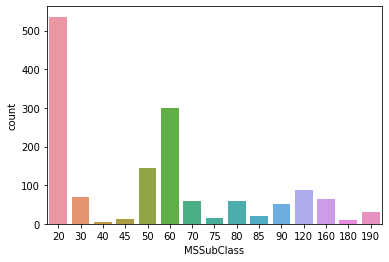



 Checking for column : MSZoning 



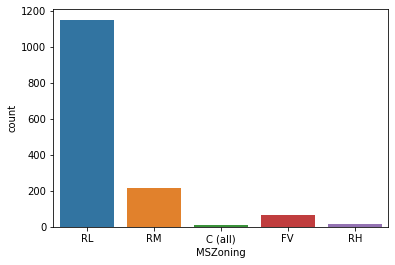



 Checking for column : Street 



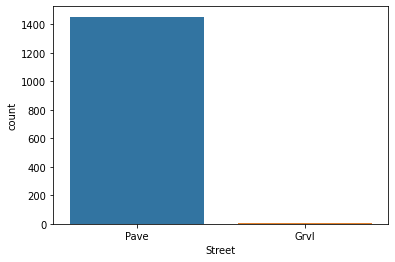



 Checking for column : LotShape 



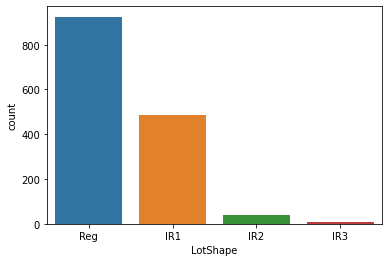



 Checking for column : LandContour 



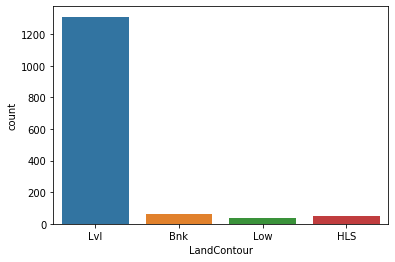



 Checking for column : Utilities 



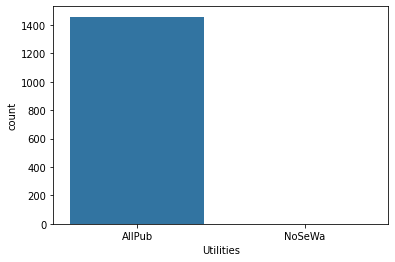



 Checking for column : LotConfig 



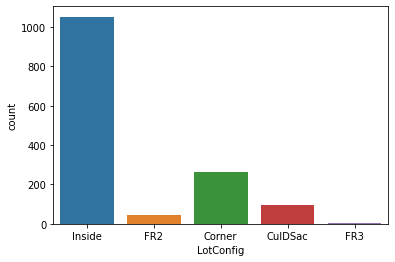



 Checking for column : LandSlope 



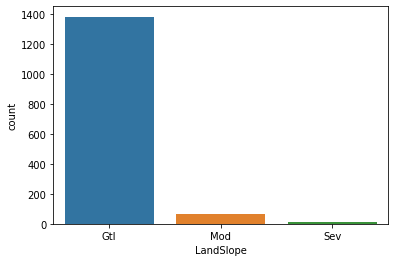



 Checking for column : Condition1 



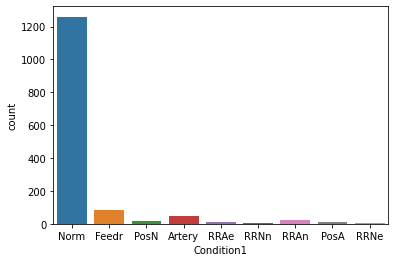



 Checking for column : Condition2 



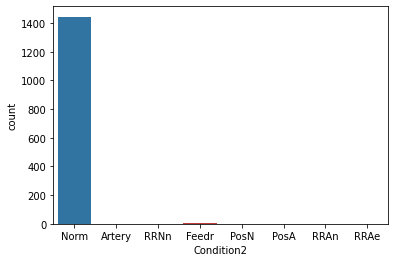



 Checking for column : BldgType 



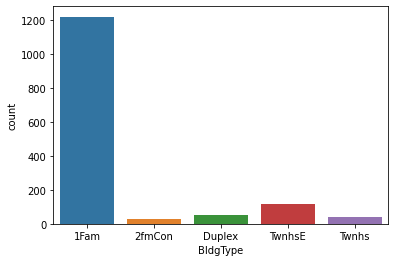



 Checking for column : HouseStyle 



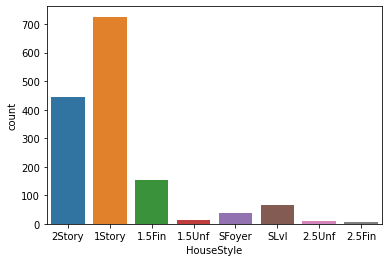



 Checking for column : OverallQual 



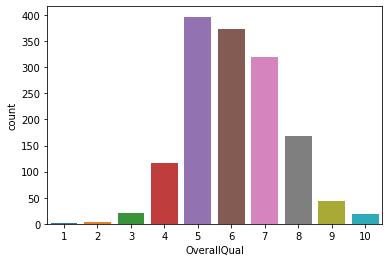



 Checking for column : OverallCond 



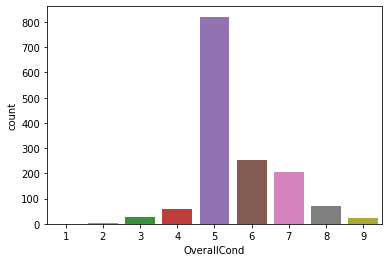



 Checking for column : RoofStyle 



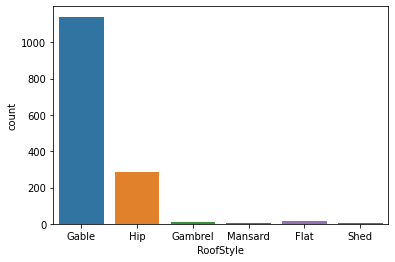



 Checking for column : RoofMatl 



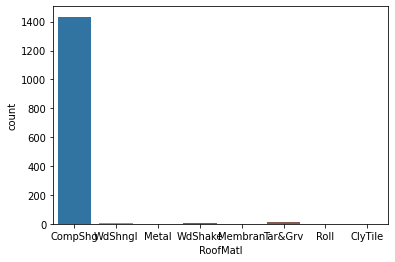



 Checking for column : Exterior1st 



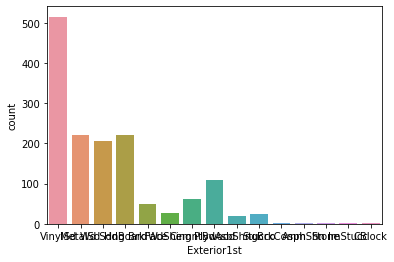



 Checking for column : Exterior2nd 



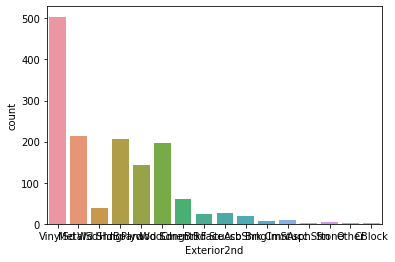



 Checking for column : MasVnrType 



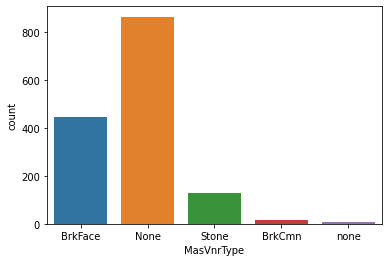



 Checking for column : ExterQual 



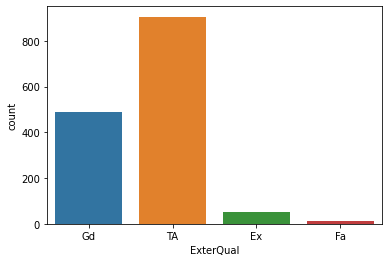



 Checking for column : ExterCond 



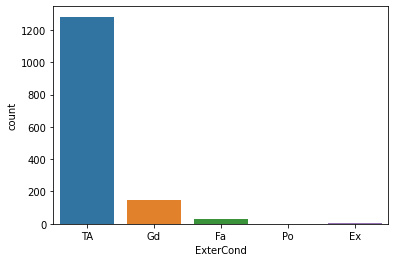



 Checking for column : Foundation 



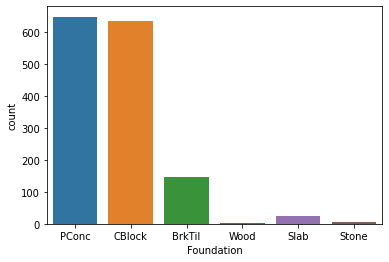



 Checking for column : BsmtQual 



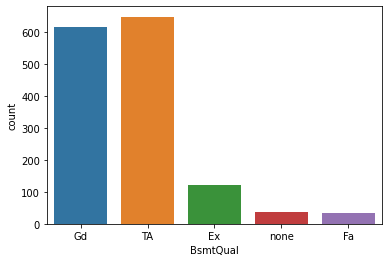



 Checking for column : BsmtCond 



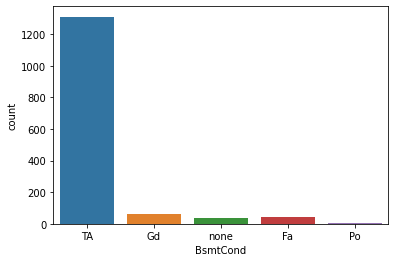



 Checking for column : BsmtExposure 



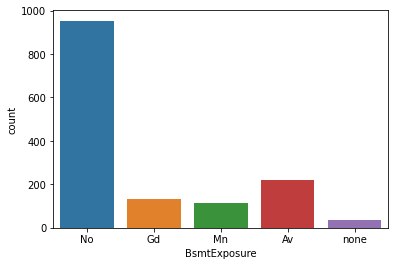



 Checking for column : BsmtFinType1 



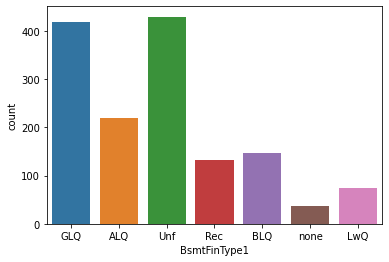



 Checking for column : BsmtFinType2 



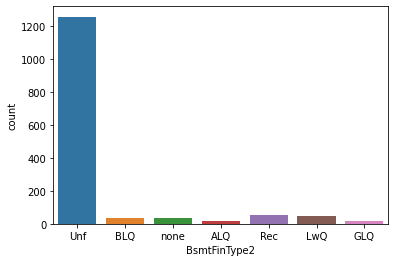



 Checking for column : Heating 



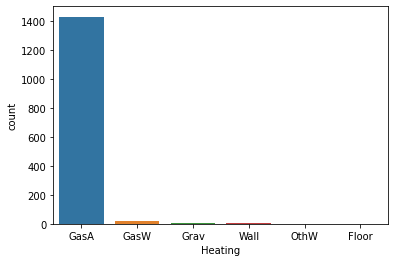



 Checking for column : HeatingQC 



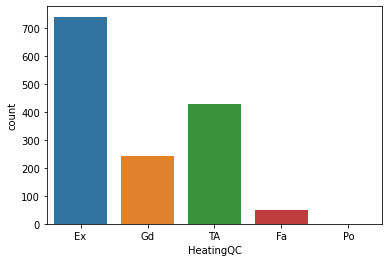



 Checking for column : CentralAir 



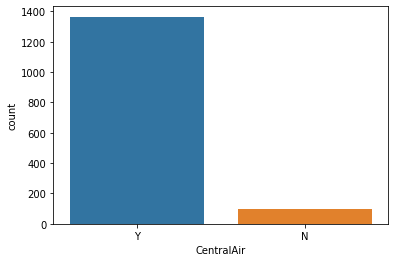



 Checking for column : Electrical 



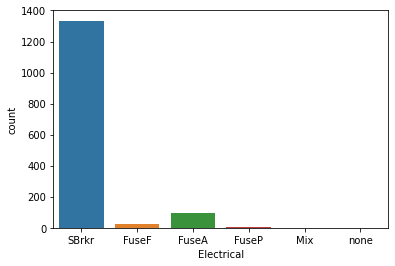



 Checking for column : BsmtFullBath 



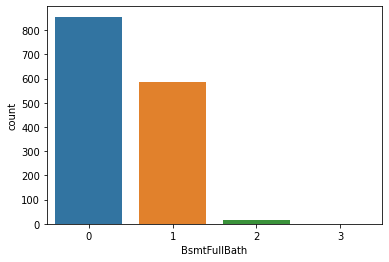



 Checking for column : BsmtHalfBath 



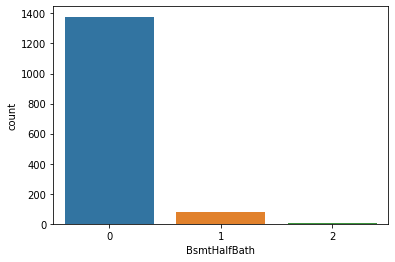



 Checking for column : FullBath 



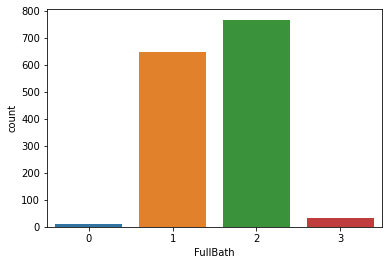



 Checking for column : HalfBath 



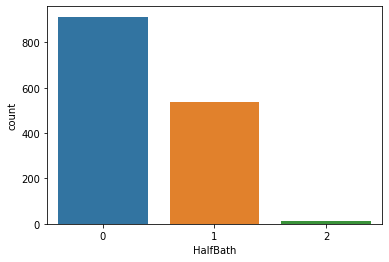



 Checking for column : BedroomAbvGr 



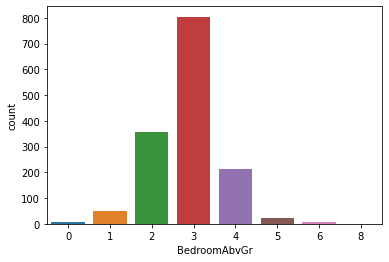



 Checking for column : KitchenAbvGr 



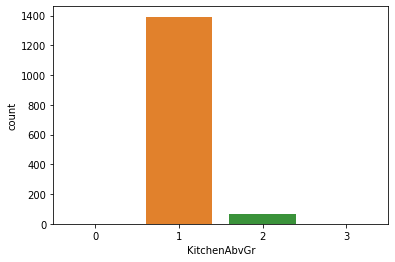



 Checking for column : KitchenQual 



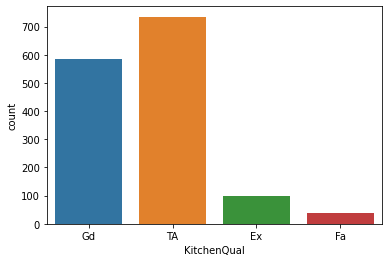



 Checking for column : TotRmsAbvGrd 



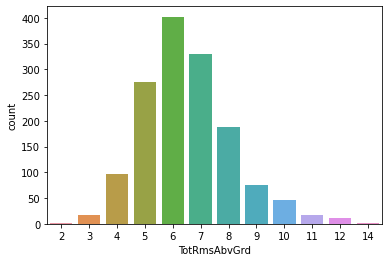



 Checking for column : Functional 



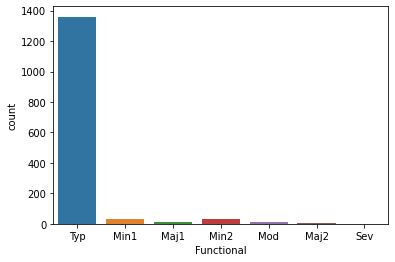



 Checking for column : Fireplaces 



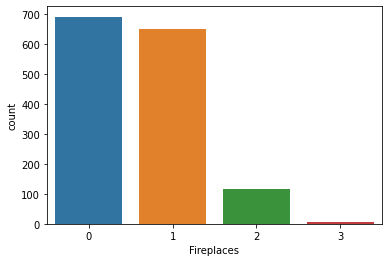



 Checking for column : FireplaceQu 



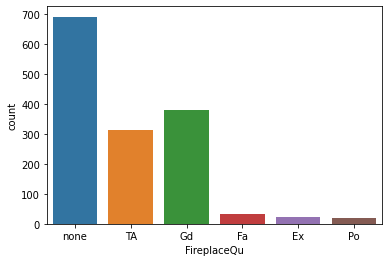



 Checking for column : GarageType 



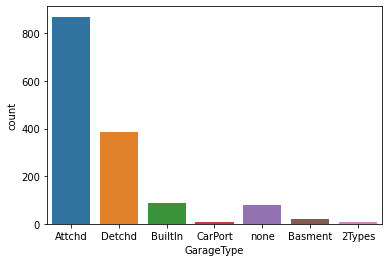



 Checking for column : GarageFinish 



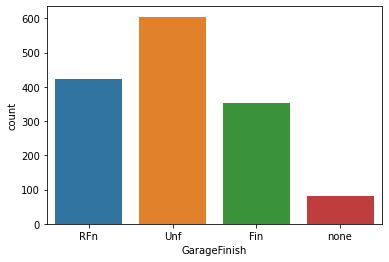



 Checking for column : GarageCars 



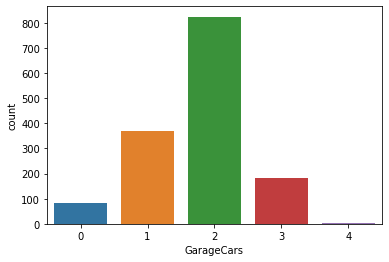



 Checking for column : GarageQual 



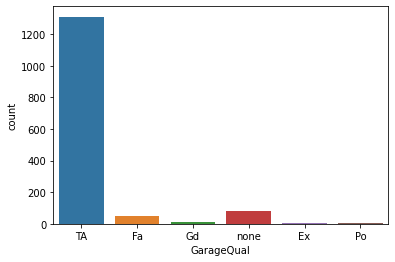



 Checking for column : GarageCond 



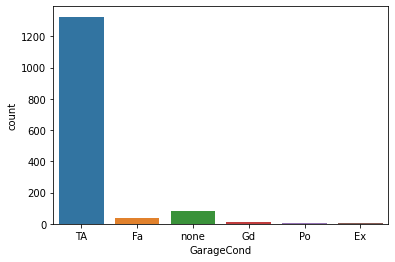



 Checking for column : PavedDrive 



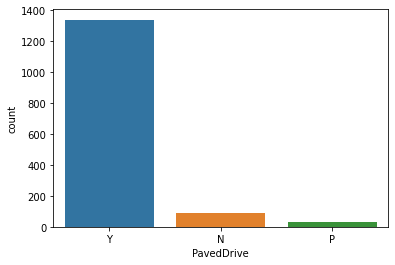



 Checking for column : 3SsnPorch 



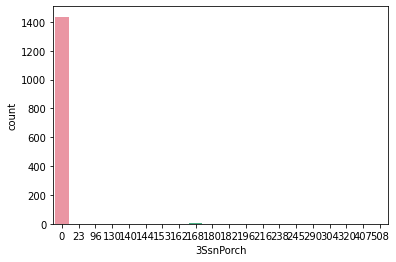



 Checking for column : PoolArea 



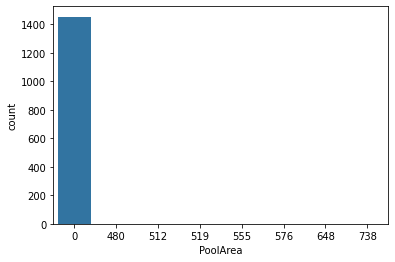



 Checking for column : MoSold 



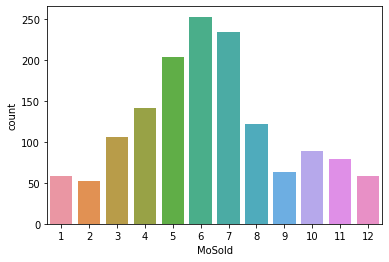



 Checking for column : YrSold 



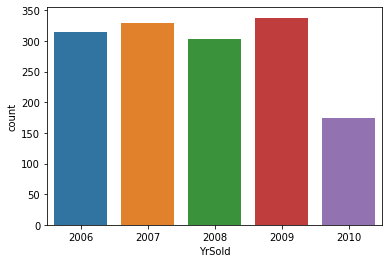



 Checking for column : SaleType 



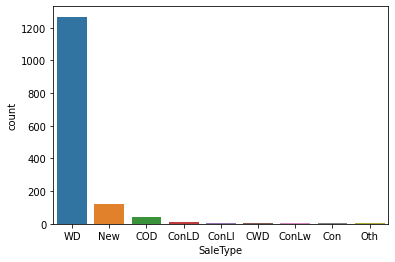



 Checking for column : SaleCondition 



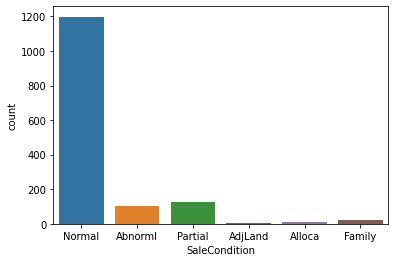

In [38]:
possible_categ_col_lst = categ_df.index.tolist()

for i in possible_categ_col_lst:
    print("\n\n Checking for column : {0} \n".format(i))
    sns.countplot(x =i, data = house_data_df)
    plt.show()

In [39]:
### Treating above list of columns as categorical columns



 Checking for column : LotFrontage 



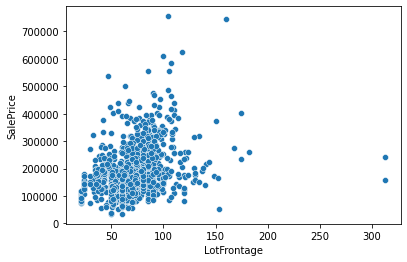



 Checking for column : LotArea 



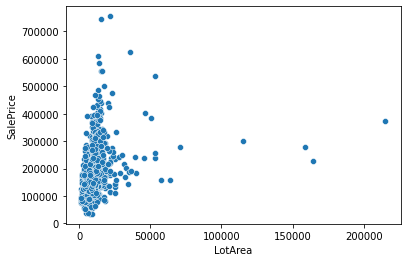



 Checking for column : Neighborhood 



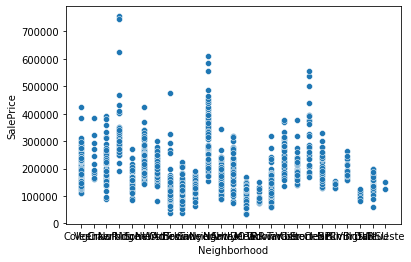



 Checking for column : YearBuilt 



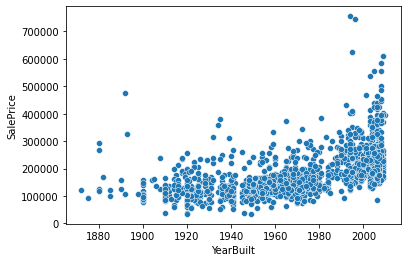



 Checking for column : YearRemodAdd 



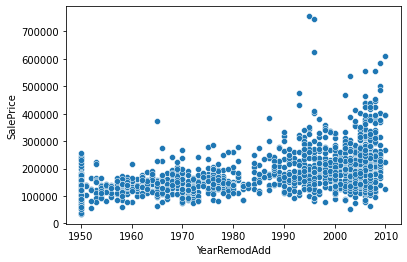



 Checking for column : MasVnrArea 



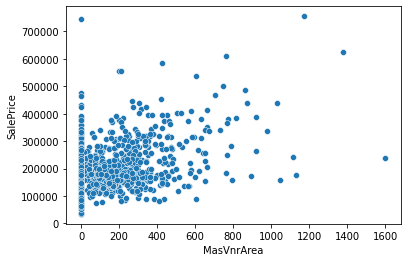



 Checking for column : BsmtFinSF1 



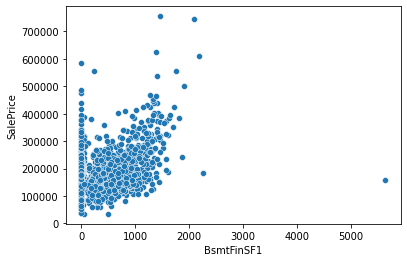



 Checking for column : BsmtFinSF2 



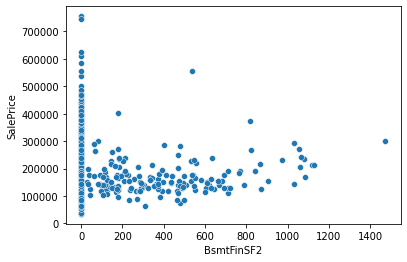



 Checking for column : BsmtUnfSF 



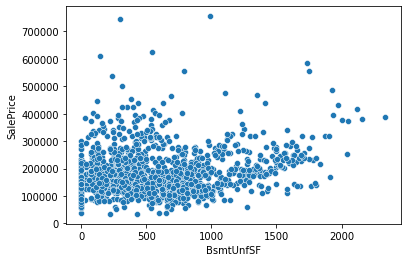



 Checking for column : TotalBsmtSF 



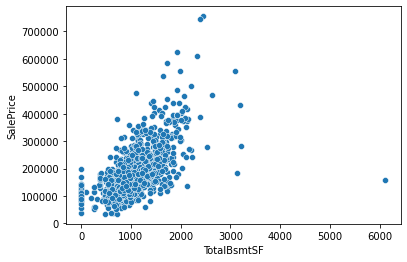



 Checking for column : 1stFlrSF 



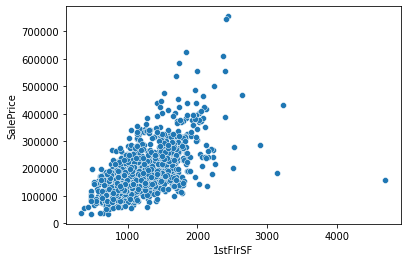



 Checking for column : 2ndFlrSF 



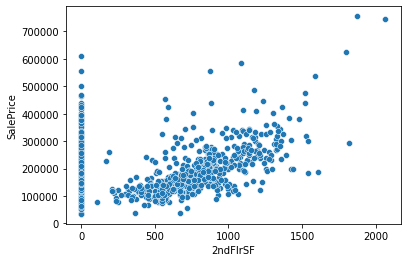



 Checking for column : LowQualFinSF 



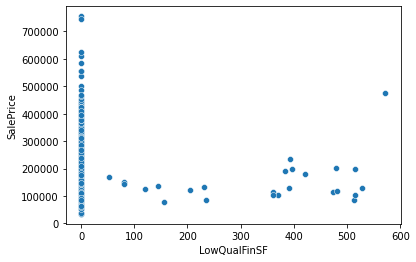



 Checking for column : GrLivArea 



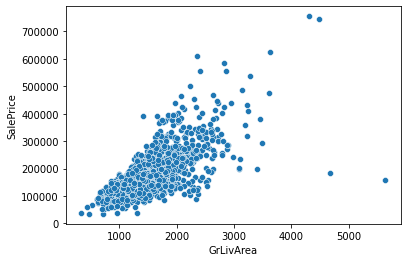



 Checking for column : GarageYrBlt 



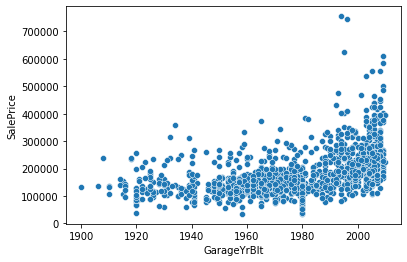



 Checking for column : GarageArea 



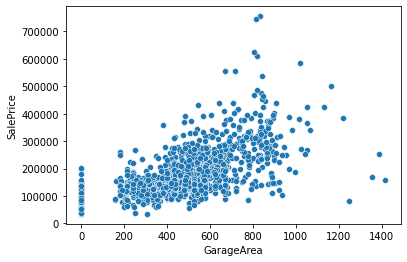



 Checking for column : WoodDeckSF 



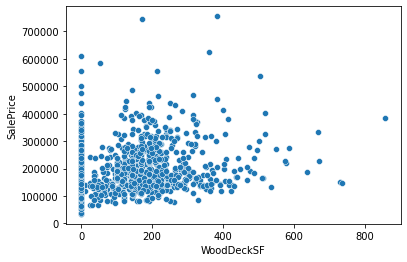



 Checking for column : OpenPorchSF 



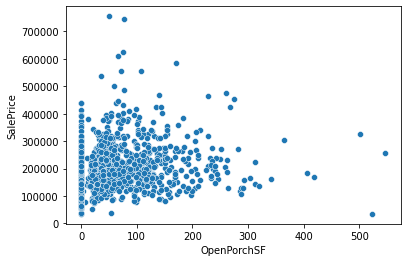



 Checking for column : EnclosedPorch 



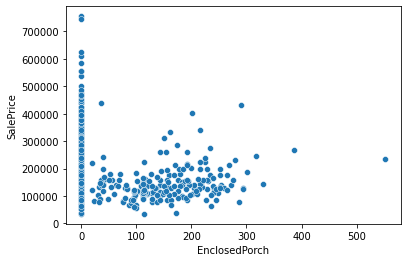



 Checking for column : ScreenPorch 



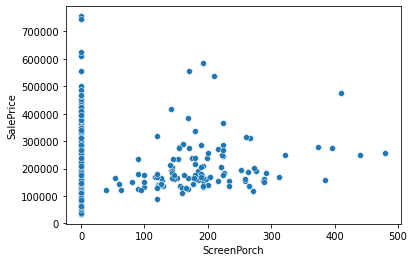



 Checking for column : MiscVal 



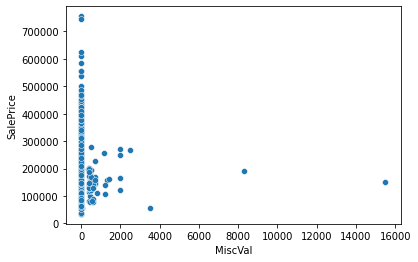

In [40]:
possible_num_col_lst = num_df.index.tolist()
possible_num_col_lst.remove("SalePrice")     ### Removing target column from the list
for i in possible_num_col_lst:
    print("\n\n Checking for column : {0} \n".format(i))
    sns.scatterplot(x =house_data_df[i], y = house_data_df["SalePrice"],data=house_data_df)
    plt.show()

In [41]:
### From the analysis of above graphs, we can say all those fields are numeric except Neighborhood

In [42]:
###Adding Neighborhood column to categorical column list

In [43]:
possible_categ_col_lst.append("Neighborhood")
categ_col_list=possible_categ_col_lst

In [44]:
num_col_list=possible_num_col_lst

In [45]:
print("Categorical column list : ",categ_col_list)

Categorical column list :  ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Neighborhood']


In [46]:
print("Numerical column list : ",num_col_list)

Numerical column list :  ['LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']


In [47]:
len(num_col_list)+len(categ_col_list)

76

In [48]:
house_data_df.shape

(1460, 76)

In [49]:
### Generating heatmap of the data to look at the correlation trend of various features

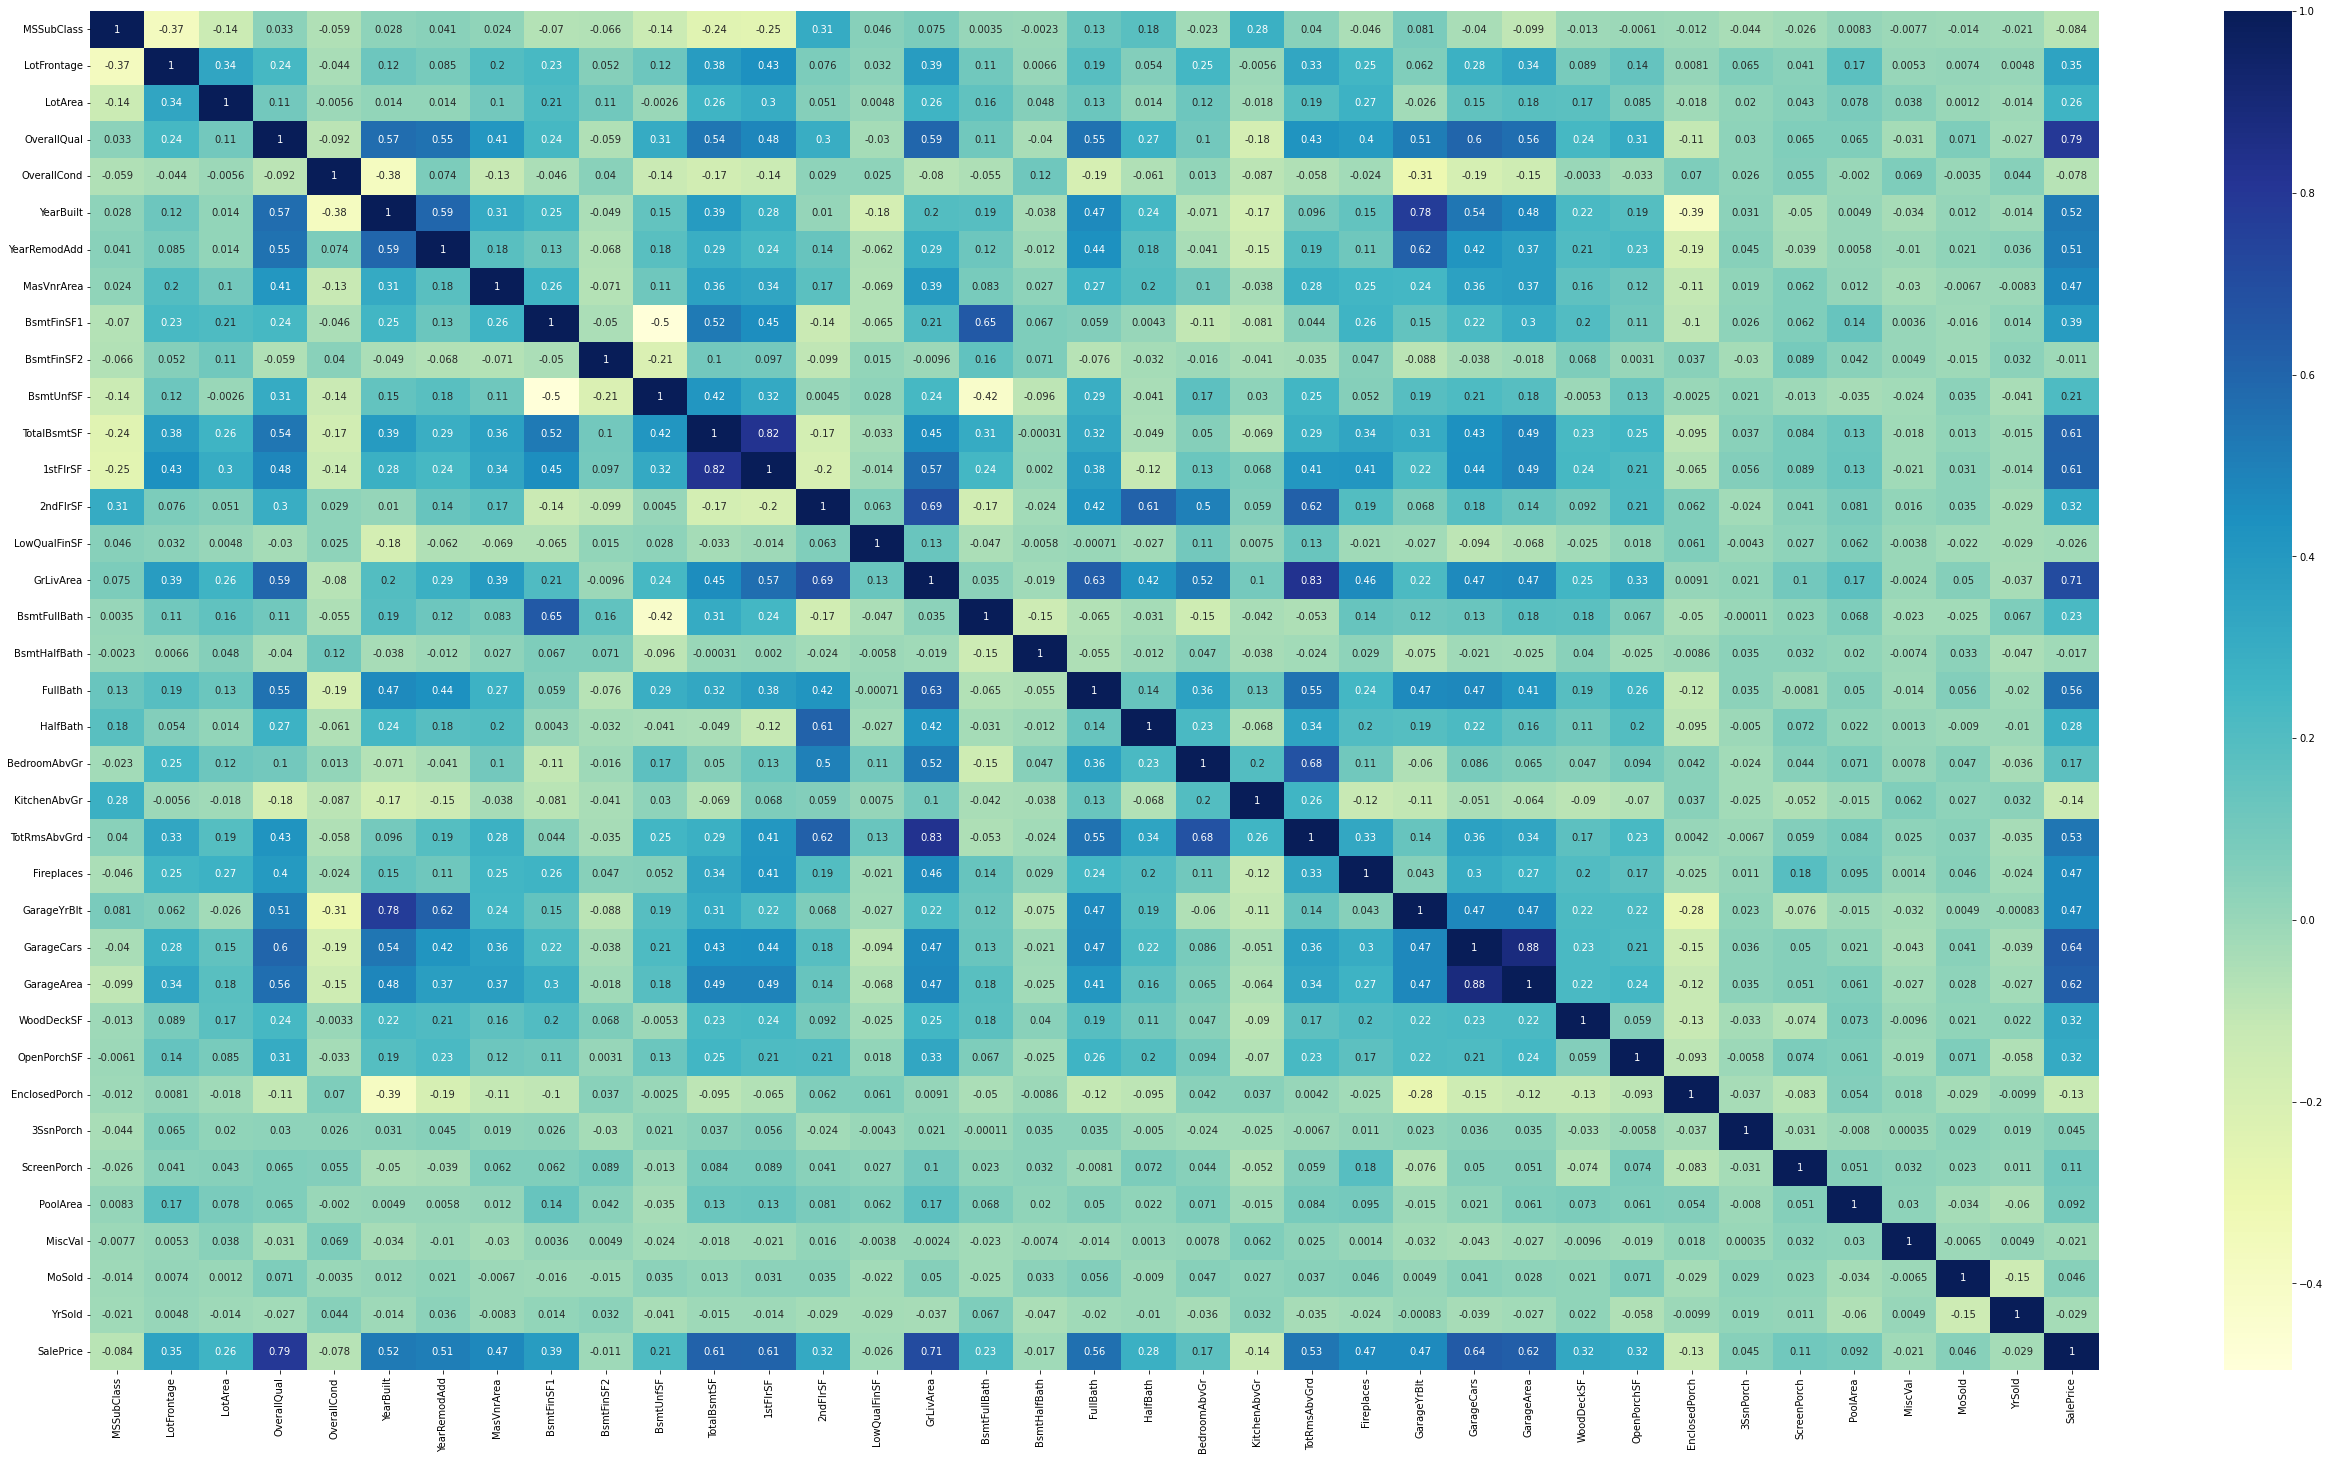

In [50]:
plt.figure(figsize=(45,25))
sns.heatmap(house_data_df.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [51]:
##Performing separate analysis for correlation between Numerical columns

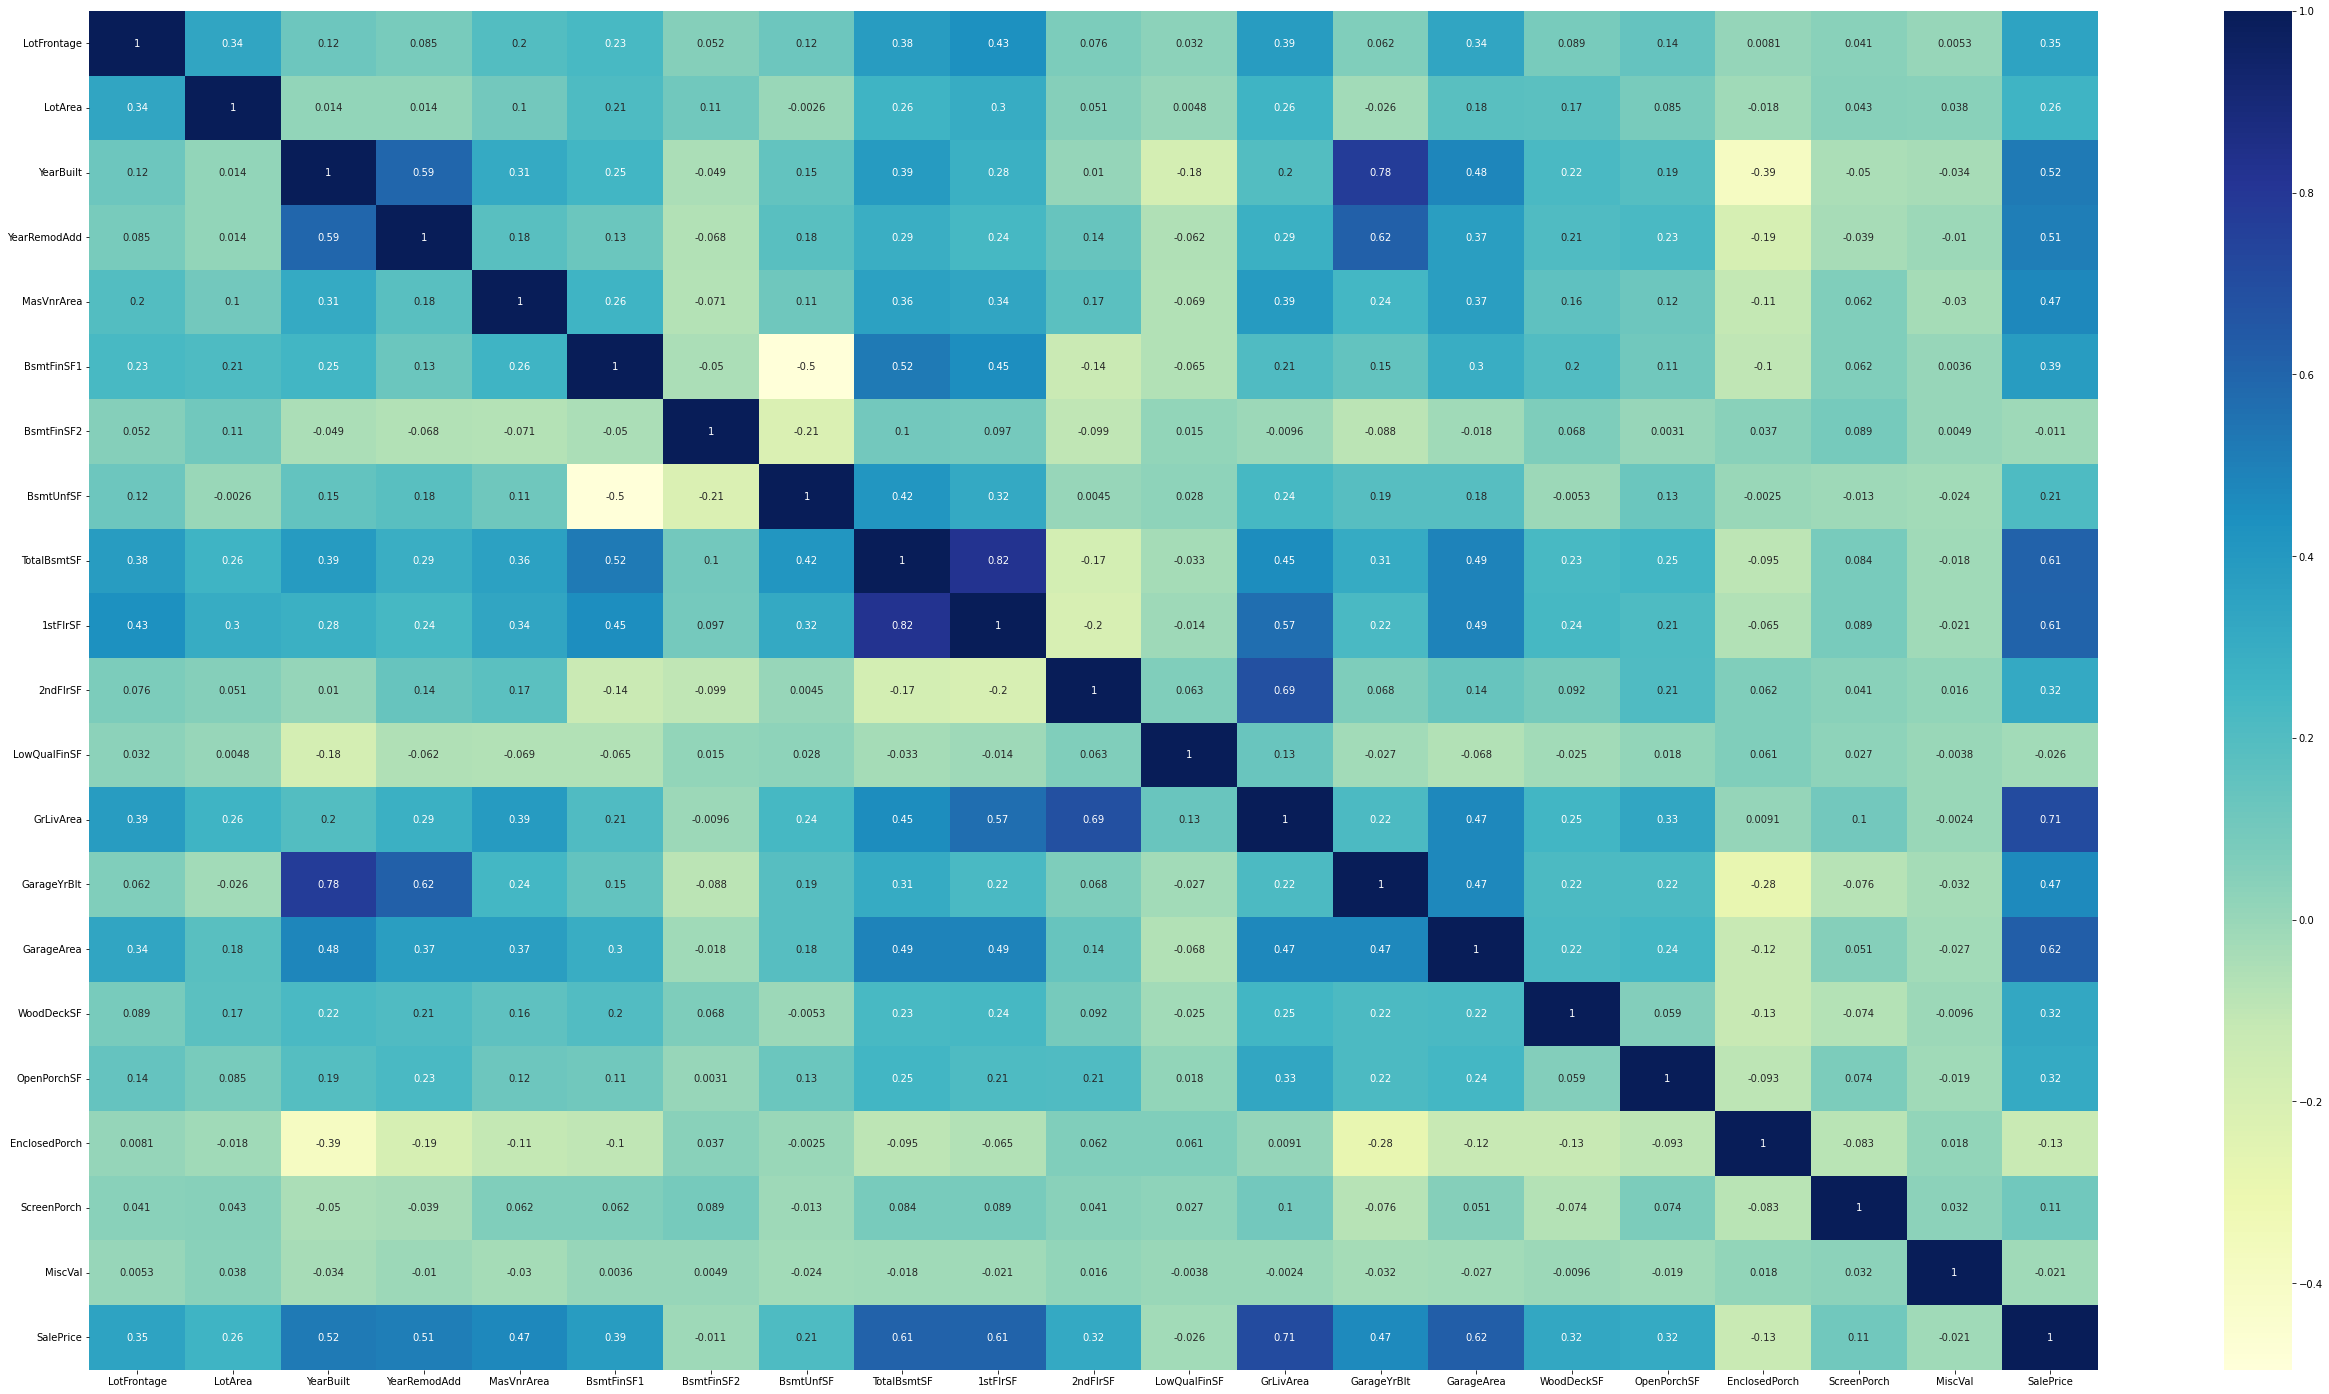

In [52]:
plt.figure(figsize=(45,25))
lst=num_col_list+['SalePrice']
sns.heatmap(house_data_df[lst].corr(), cmap="YlGnBu", annot=True)

plt.show()

In [53]:
##Performing separate analysis for correlation between Categorical columns

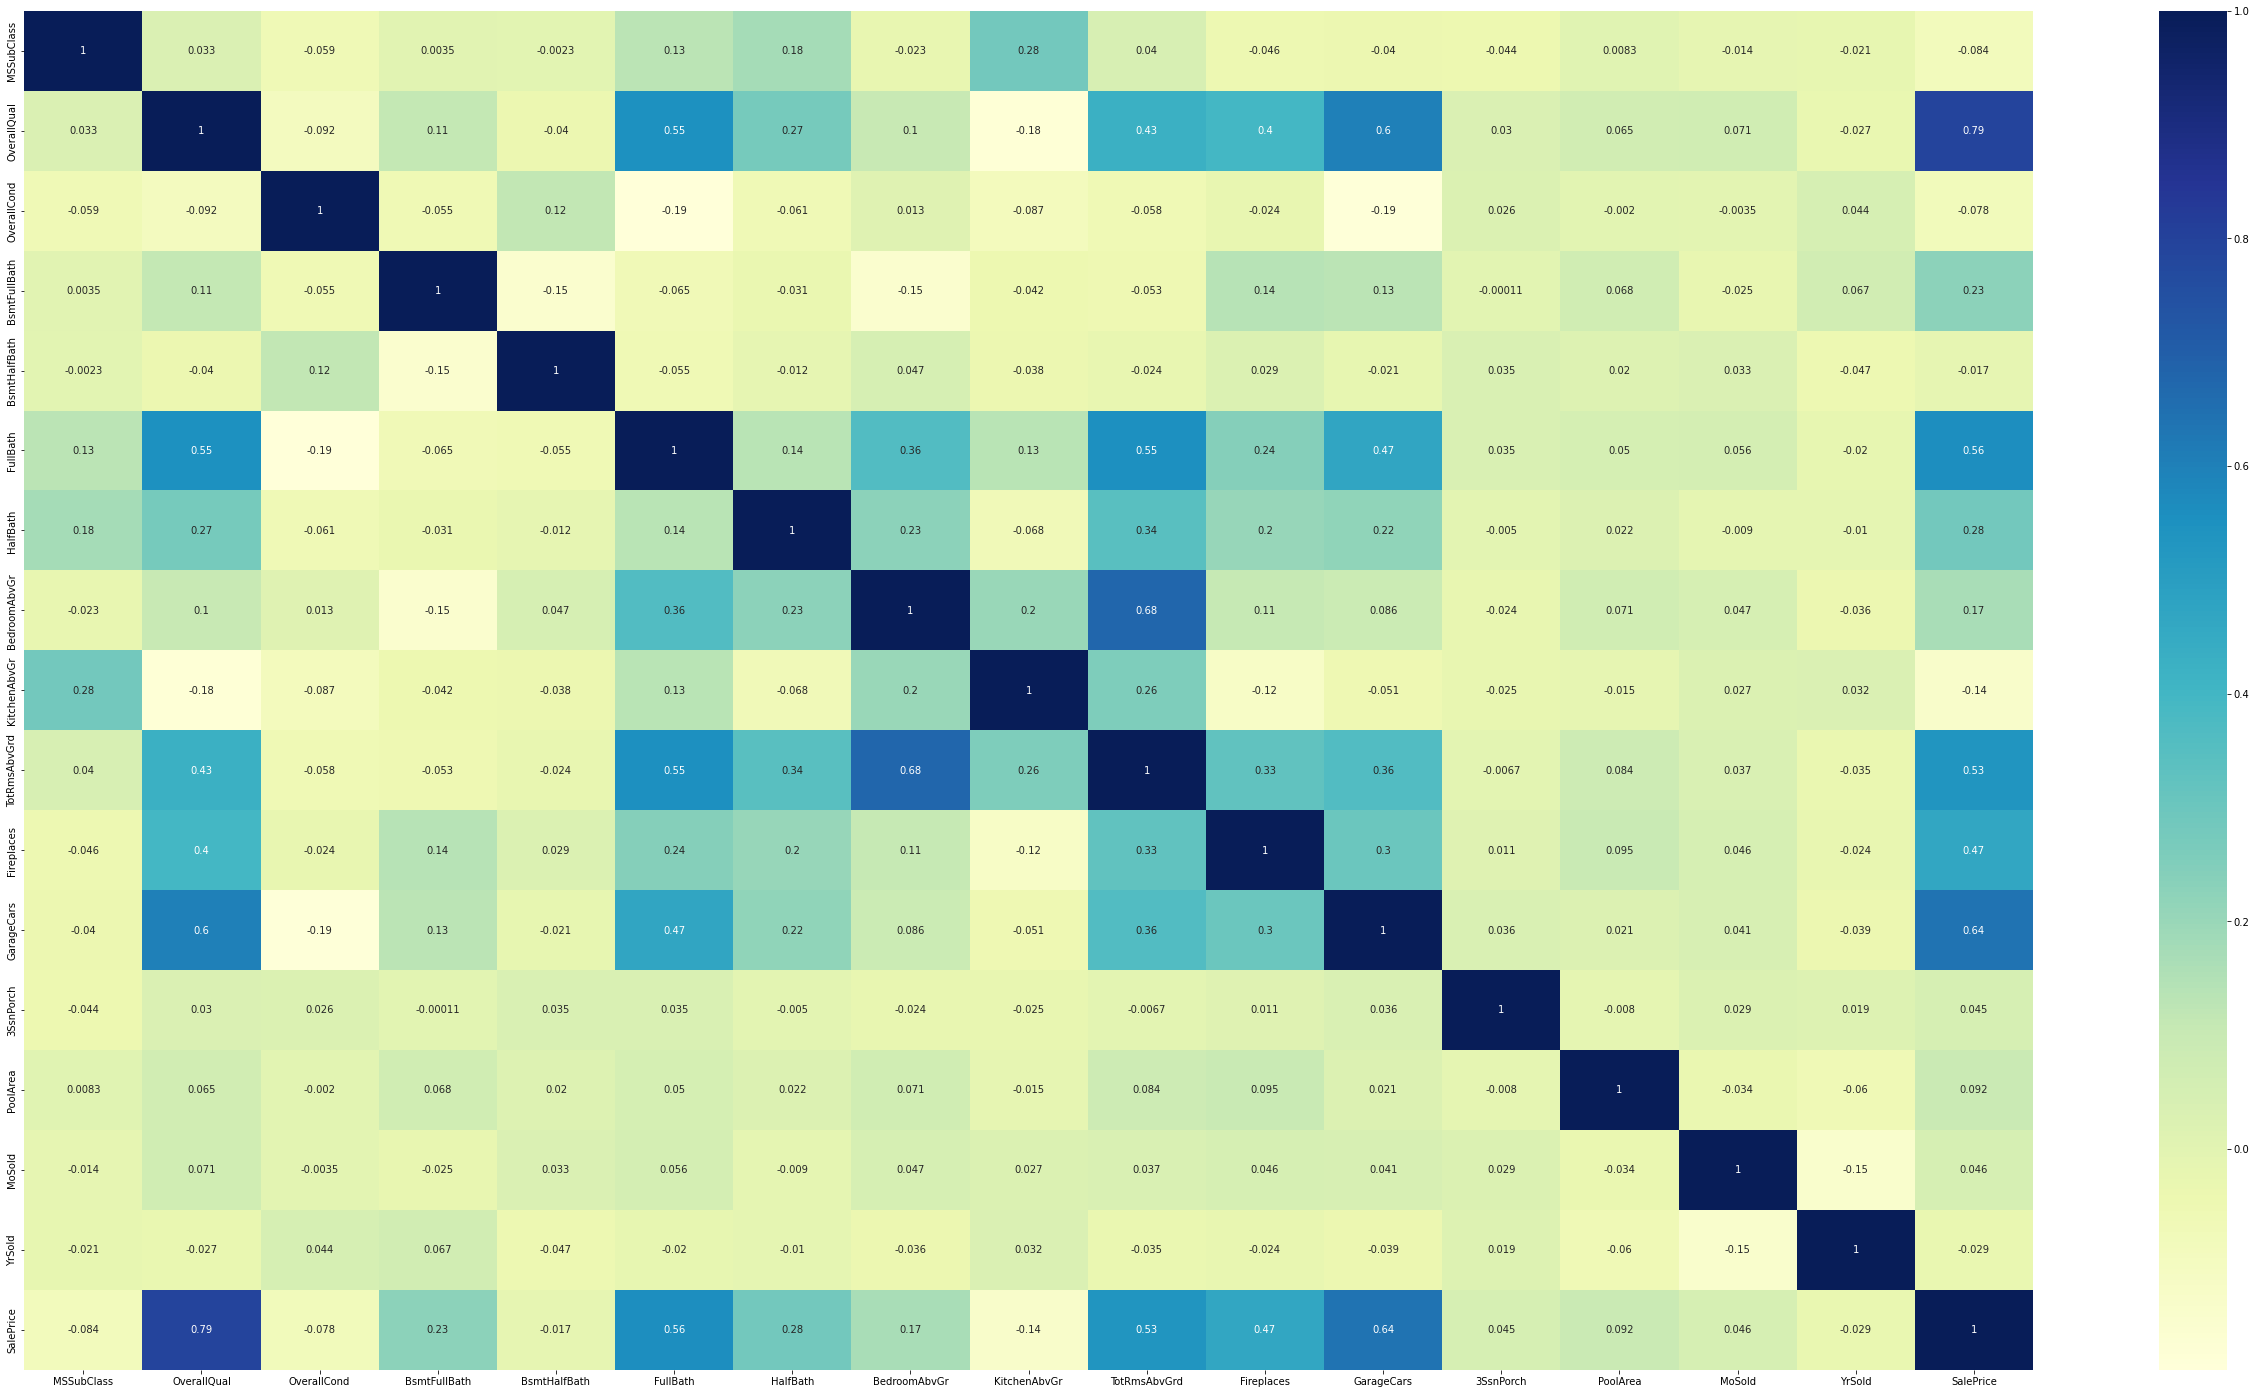

In [54]:
plt.figure(figsize=(45,25))
lst=categ_col_list+['SalePrice']
sns.heatmap(house_data_df[lst].corr(), cmap="YlGnBu", annot=True)

plt.show()

In [55]:
corr = house_data_df.corr()

# Find the column names where correlation is greater than 50%
corr_pairs = []
for i in range(len(corr)):
    for j in range(i + 1, len(corr)):
        if corr.iloc[i, j] > 0.5:
            corr_pairs.append((corr.index[i], corr.index[j]))

# Print the column names
print(corr_pairs)

[('OverallQual', 'YearBuilt'), ('OverallQual', 'YearRemodAdd'), ('OverallQual', 'TotalBsmtSF'), ('OverallQual', 'GrLivArea'), ('OverallQual', 'FullBath'), ('OverallQual', 'GarageYrBlt'), ('OverallQual', 'GarageCars'), ('OverallQual', 'GarageArea'), ('OverallQual', 'SalePrice'), ('YearBuilt', 'YearRemodAdd'), ('YearBuilt', 'GarageYrBlt'), ('YearBuilt', 'GarageCars'), ('YearBuilt', 'SalePrice'), ('YearRemodAdd', 'GarageYrBlt'), ('YearRemodAdd', 'SalePrice'), ('BsmtFinSF1', 'TotalBsmtSF'), ('BsmtFinSF1', 'BsmtFullBath'), ('TotalBsmtSF', '1stFlrSF'), ('TotalBsmtSF', 'SalePrice'), ('1stFlrSF', 'GrLivArea'), ('1stFlrSF', 'SalePrice'), ('2ndFlrSF', 'GrLivArea'), ('2ndFlrSF', 'HalfBath'), ('2ndFlrSF', 'BedroomAbvGr'), ('2ndFlrSF', 'TotRmsAbvGrd'), ('GrLivArea', 'FullBath'), ('GrLivArea', 'BedroomAbvGr'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', 'SalePrice'), ('FullBath', 'TotRmsAbvGrd'), ('FullBath', 'SalePrice'), ('BedroomAbvGr', 'TotRmsAbvGrd'), ('TotRmsAbvGrd', 'SalePrice'), ('GarageCar

#### We observe that some of the columns are showing correlation, checking and dropping the fields as required

In [56]:
corr_matrix = house_data_df.corr()
column_name = 'SalePrice'


# Filter the correlation matrix with abs value >0.5 for correlation with SalePrice
filtered_corr_matrix = corr_matrix[column_name].abs() > 0.5

# Get the column names from filtered correlation matrix
filtered_column_names = filtered_corr_matrix.index[filtered_corr_matrix.values]


In [57]:
cols=filtered_corr_matrix[filtered_corr_matrix==True].index.tolist()

In [58]:
print(cols)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


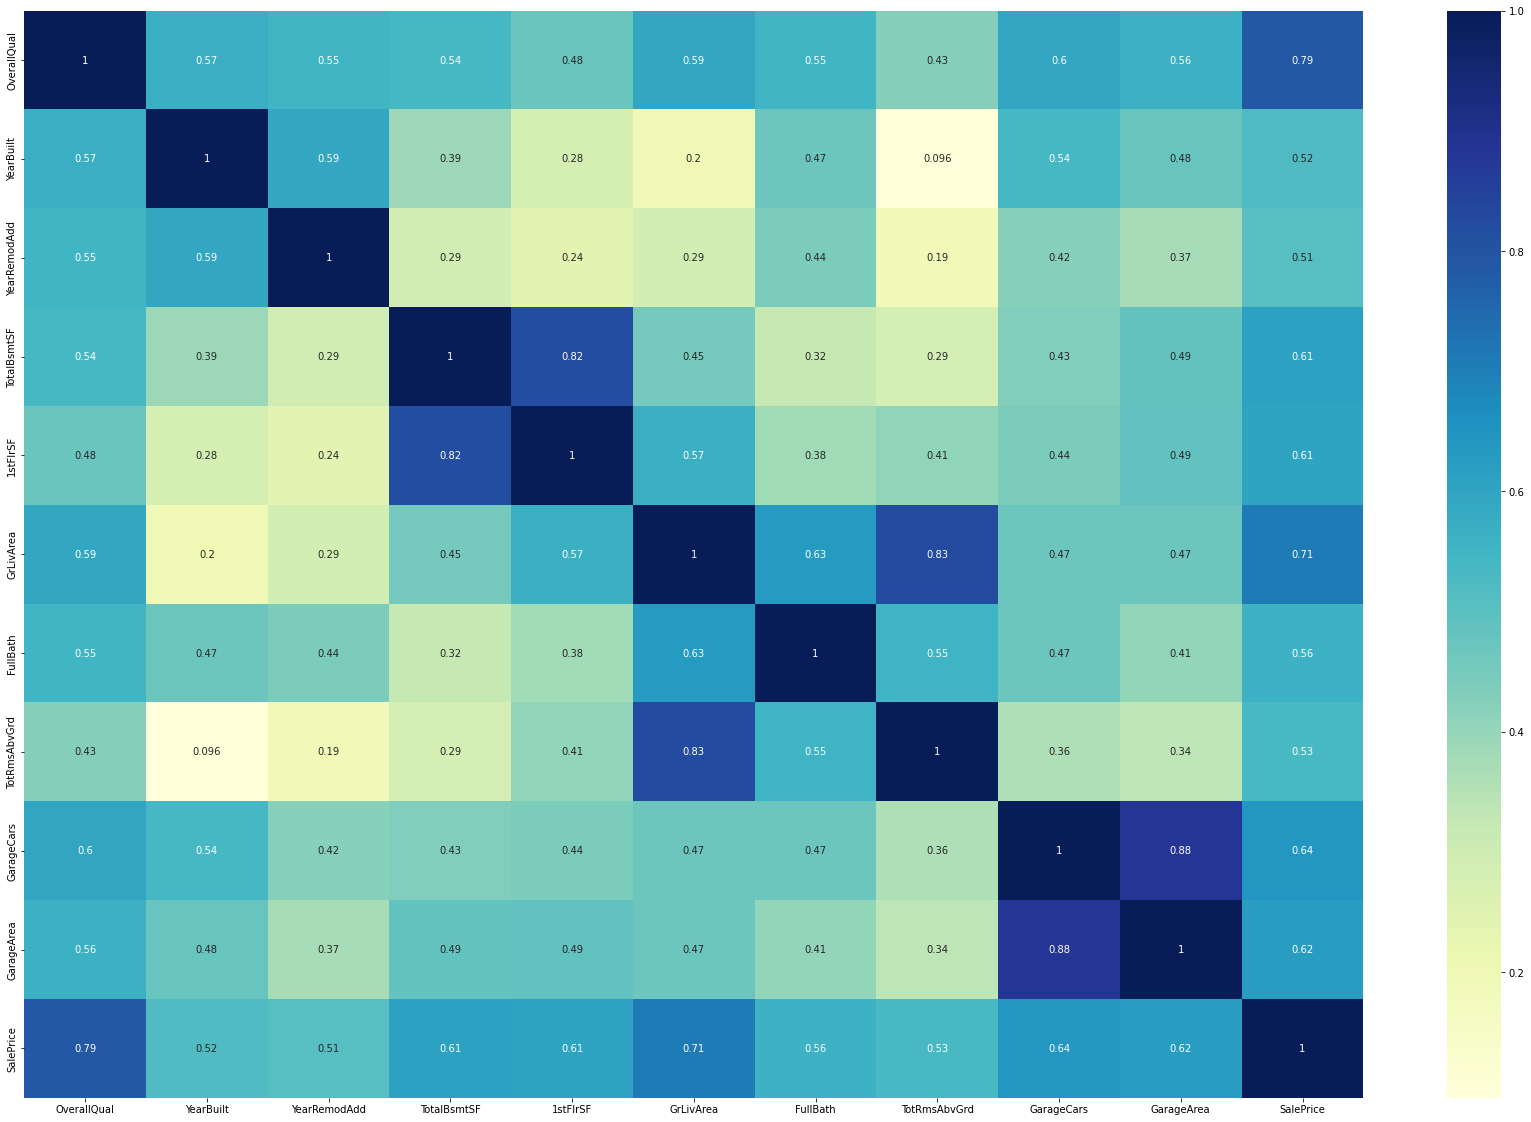

In [59]:
plt.figure(figsize=(30,20))

sns.heatmap(house_data_df[cols].corr(), cmap="YlGnBu", annot=True)

plt.show()

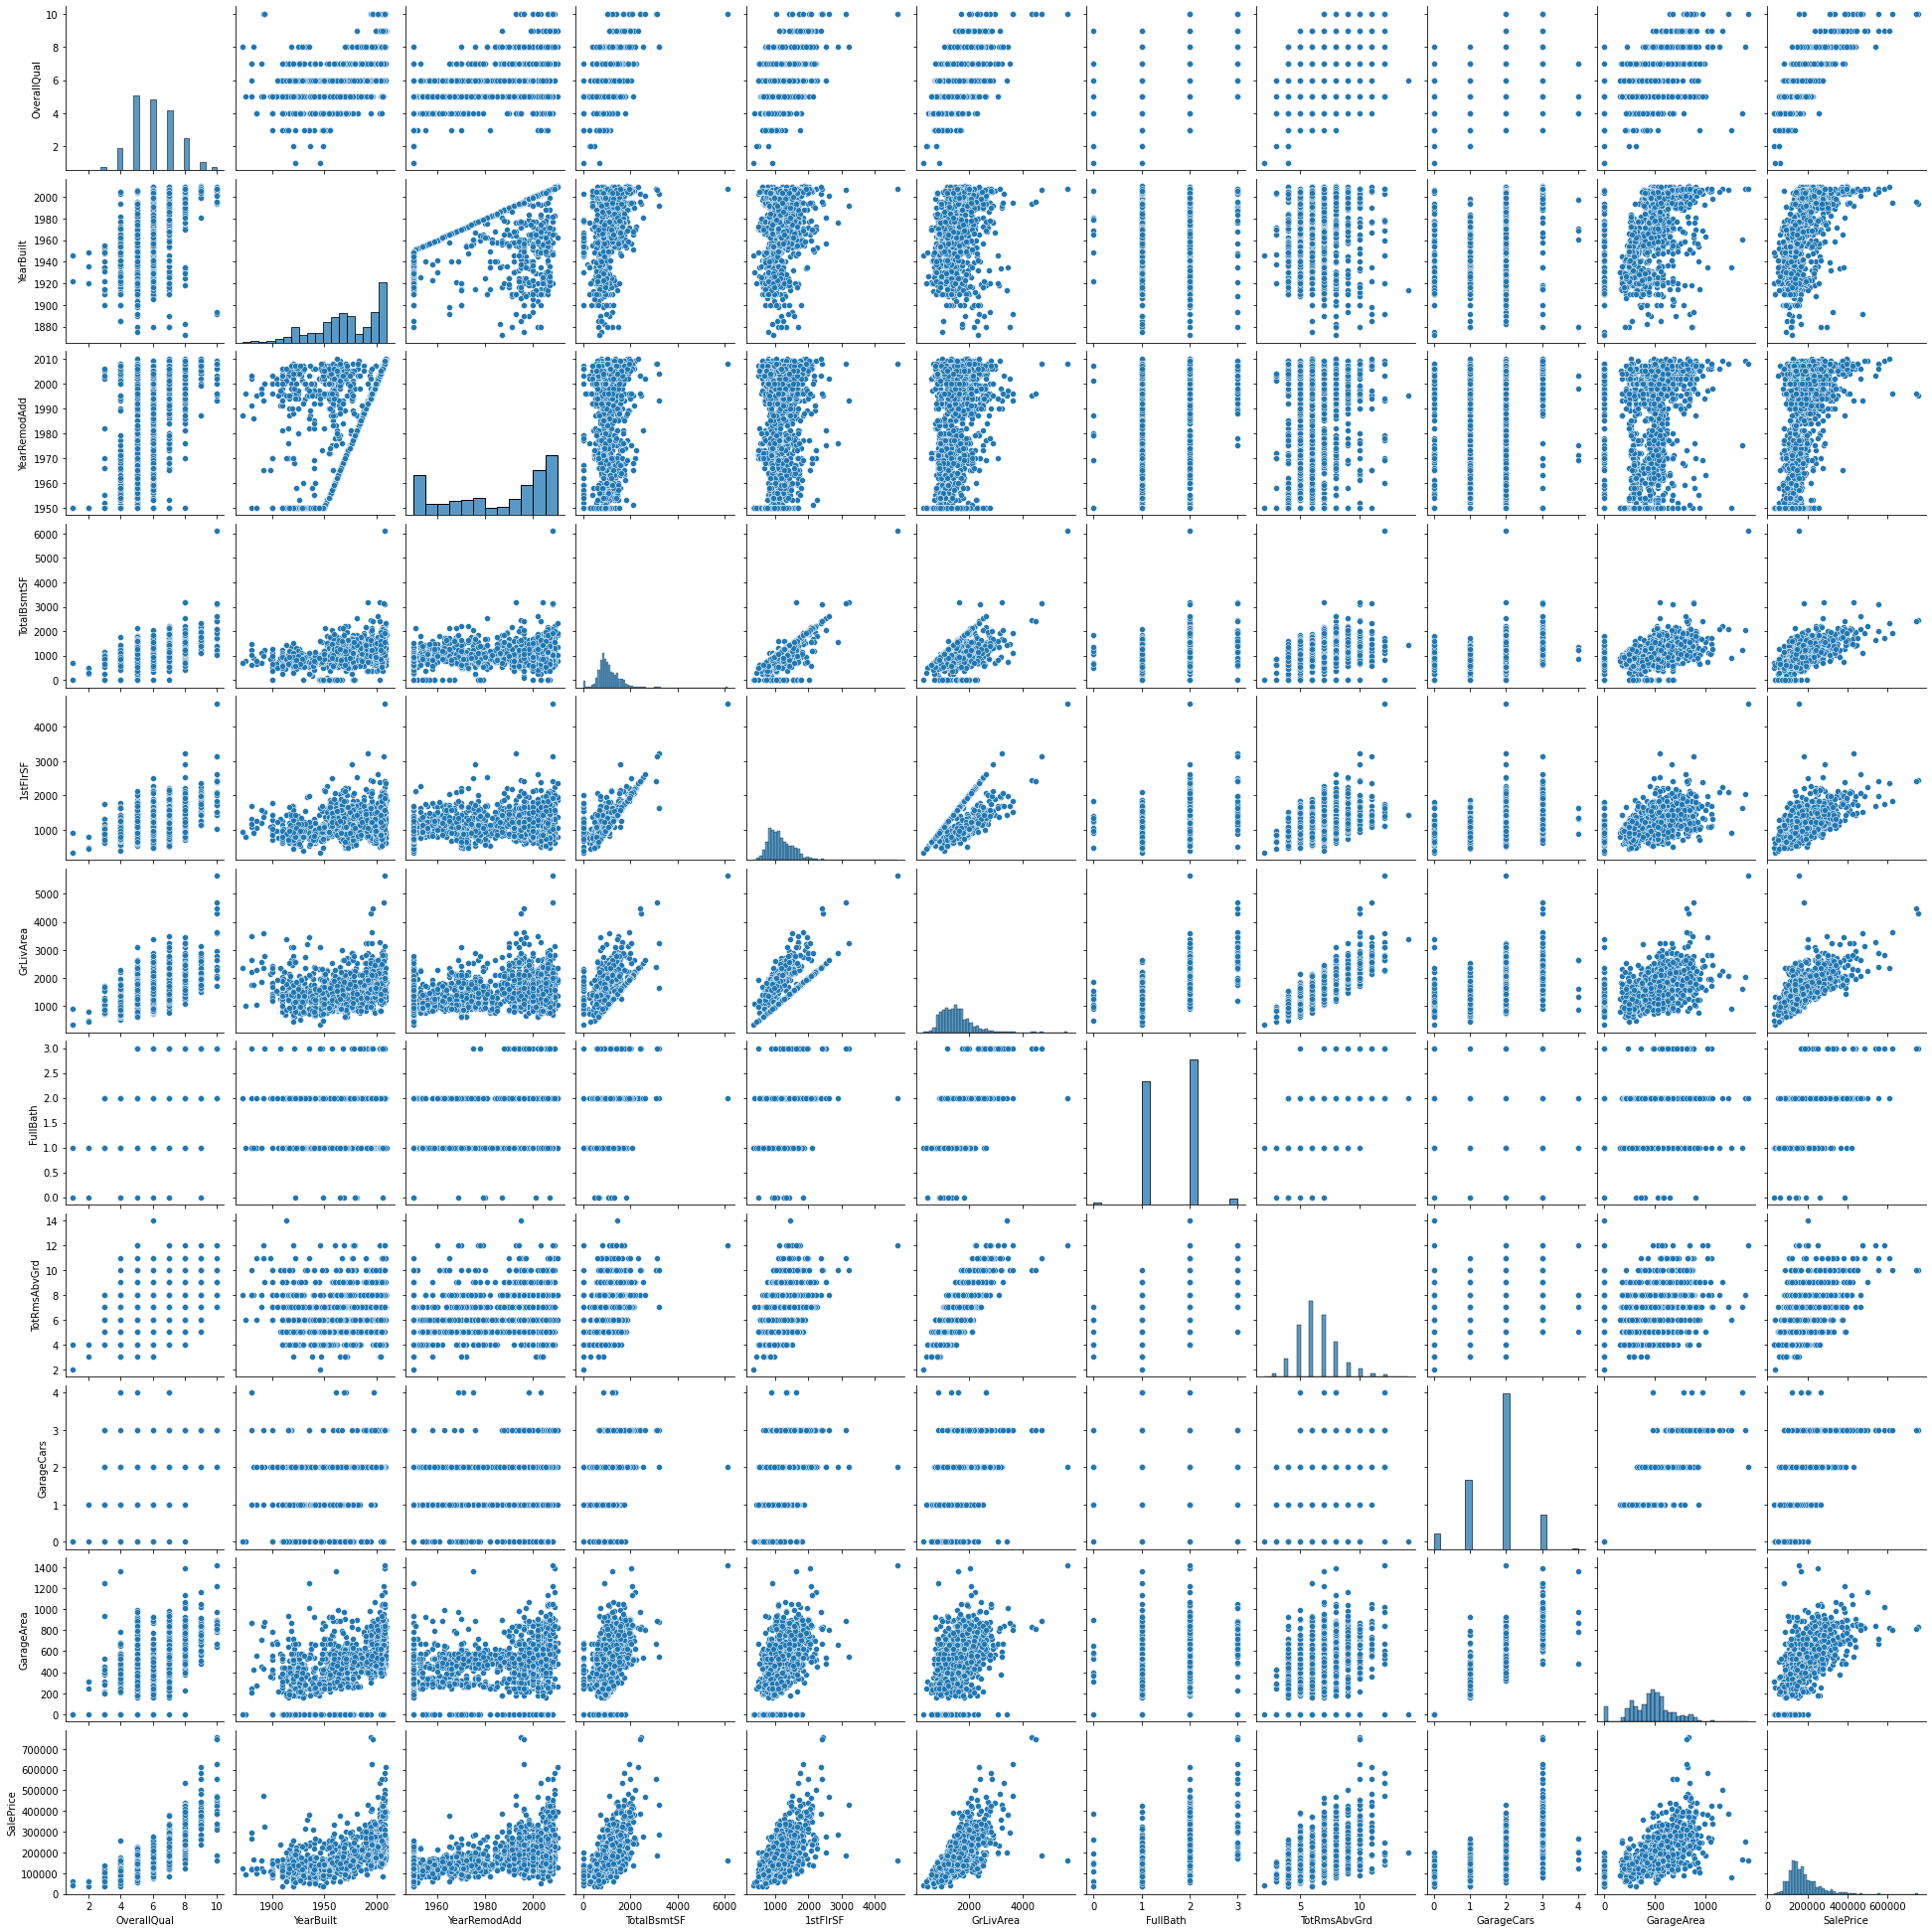

In [60]:
# Checking further metrics of the correlated pairs
sns.pairplot(house_data_df[cols], size = 2.5)
plt.show()

### Dropping the co-related columns which doesn't contribute to Target: 'SalePrice'
#### ** We can also observe outliers, but as the dataset isvery small it is not advisable to drop them

In [61]:
house_data_df = house_data_df.drop(['GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt'], axis = 1)


In [62]:
house_data_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        none     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ       

In [63]:
print(cols)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [64]:
## Checking the latest shape of the dataset
house_data_df.shape

(1460, 73)

### 2.Data preparation

#### Deriving Property Age( PropAge ) field & checking it's imapct on the SalePrice( Target Variable)

In [65]:
# Property Age( PropAge ) = yearsold - yearbuilt
house_data_df['PropAge'] = (house_data_df['YrSold'] - house_data_df['YearBuilt'])
house_data_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        none     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ       

<AxesSubplot:xlabel='PropAge', ylabel='SalePrice'>

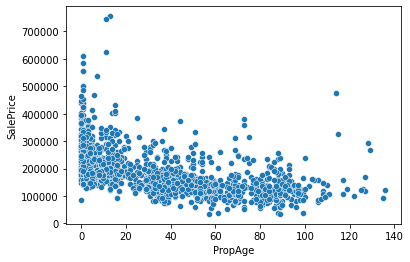

In [66]:
# Plotting PropAge vs SalePrice
sns.scatterplot(x = house_data_df['PropAge'], y = house_data_df['SalePrice'])


#### We can observe that the SalePrice is negatively related to PropAge i.e- the newer the property the higher he price

##### Verifying the impact of other Property related field in the dataset

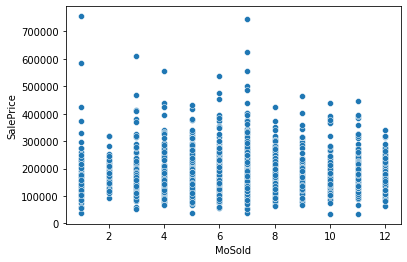

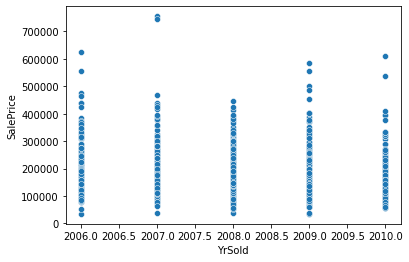

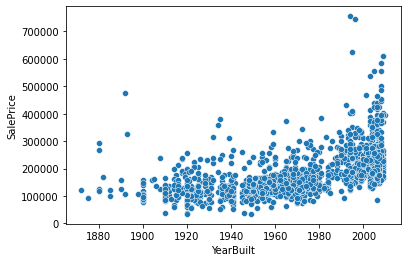

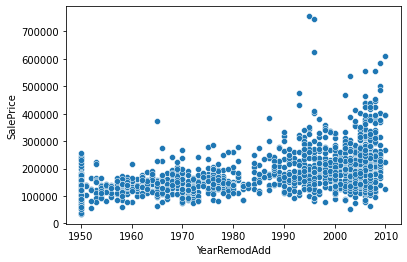

In [67]:
for i in ['MoSold','YrSold','YearBuilt','YearRemodAdd']:
    sns.scatterplot(x = house_data_df[i], y = house_data_df['SalePrice'])
    plt.show()

### Removing the 4 fields as MoSold,YrSold doesn't showcase any significant trend and inputs from YearBuilt & YearRemodAdd is already reflected by PropAge field

In [68]:
house_data_df = house_data_df.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)


In [69]:
house_data_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0         1             3             1          Gd        Typ           0   
1         0             3             1          TA        Typ           1   
2         1             3             1          Gd        Typ           1   
3         0             3             1          Gd        Typ           1   
4         1             4             1          Gd        Typ           1   

  FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond  \
0        none     Attchd          RFn         548         TA         TA   
1          TA     Attchd          RFn         460         TA         TA   
2          TA     Attchd          RFn         608 

In [70]:
# Checking the new shape
house_data_df.shape

(1460, 70)

In [71]:
Dtypes=house_data_df.dtypes

In [72]:
numCols = list(Dtypes[(Dtypes == 'int64') | (Dtypes == 'float64')].index)
categCols = list(Dtypes[Dtypes == object].index)

In [73]:
print("len(numCols) : ",len(numCols),", len(categCols) : ",len(categCols),", Total len(Dtypes) : ",len(Dtypes))


len(numCols) :  31 , len(categCols) :  39 , Total len(Dtypes) :  70


#### Creating Dummies fot Categorical columns

In [74]:
house_data_df = pd.get_dummies(house_data_df, drop_first=True)
house_data_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0             3             1           0         548           0   
1             3             1           1         460         298   
2             3             1           1         608           0   
3             3             1           1         642           0   
4             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0     208500        5            0            0            1            0   
1     181500       31            0            0            1            0   
2     223500        7            0            0            1            0   
3     140000       91            0            0            1            0   
4     250000        8            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   
3                0                1                 0                  0   
4                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0      

In [75]:
# Checking the new shape
house_data_df.shape

(1460, 243)

### Separting Predictor(Independent) and Target(Dependent) columns

In [76]:
X = house_data_df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0             3             1           0         548           0   
1             3             1           1         460         298   
2             3             1           1         608           0   
3             3             1           1         642           0   
4             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        5            0            0            1            0            1   
1       31            0            0            1            0            1   
2        7            0            0            1            0            1   
3       91            0            0            1            0            1   
4        8            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4            

In [77]:
y = house_data_df['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Creating test-train split with random_state=100

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
scaler = StandardScaler()

X_train[X.columns.tolist()] = scaler.fit_transform(X_train[X.columns.tolist()])

X_test[X.columns.tolist()] = scaler.fit_transform(X_test[X.columns.tolist()])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.657071    -0.136829 -0.473765    -0.779861     0.383154   -0.558025   
318     0.035976     0.889247 -0.056845     0.649651    -0.533005    0.809137   
239    -0.195040    -0.806009 -0.169324    -0.065105    -1.449164   -0.558025   
986    -0.195040    -0.493725 -0.502297    -0.065105     2.215472   -0.558025   
1416    3.039179    -0.449113  0.082905    -1.494617     0.383154   -0.558025   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210     0.043512   -0.293313  -0.374367    -0.430911 -0.765065 -0.787597   
318     1.160345   -0.293313  -0.454644     0.621579  0.511914  2.140556   
239    -0.761296   -0.293313   0.171964    -0.712011 -0.930972  0.795996   
986    -0.963574   -0.293313  -0.175904    -1.256778 -0.420683  0.669584   
1416   -0.963574   -0.293313   0.475233    -0.620490  0.195183  1.611926   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
210      -0.124502  -1.228053      1.066863     -0.247791 -1.026085 -0.751723   
318      -0.124502   2.123103      1.066863     -0.247791  0.786428  1.246998   
239      -0.124502  -0.056465     -0.837450     -0.247791 -1.026085  1.246998   
986      -0.124502   0.221858     -0.837450     -0.247791 -1.026085 -0.751723   
1416     -0.124502   1.453624     -0.837450     -0.247791  0.786428 -0.751723   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
210      -1.042717     -0.234155   -0.925422   -2.217786   -0.743160   
318       1.396261     -0.234155    0.623522    0.867506    1.989482   
239       0.176772     -0.234155    0.623522   -1.183084   -0.743160   
986      -1.042717     -0.234155   -0.925422   -1.018473    2.423490   
1416      1.396261      4.112612   -0.925422    0.416000   -0.743160   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
210     -0.709347       1.150231  -0.121922    -0.275126 -0.062302 -0.084263   
318      0.197980       1.910043  -0.121922    -0.275126 -0.062302 -0.084263   
239      1.407748      -0.369395  -0.121922    -0.275126 -0.062302 -0.084263   
986     -0.709347      -0.369395  -0.121922    -0.275126 -0.062302 -0.084263   
1416    -0.709347       1.435160  -0.121922    -0.275126 -0.062302 -0.084263   

       PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
210   1.529604    -0.214724    -0.113564     0.522558    -0.421455   
318  -0.677573    -0.214724    -0.113564     0.522558    -0.421455   
239   0.936631    -0.214724    -0.113564     0.522558    -0.421455   
986   1.957862    -0.214724    -0.113564    -1.913662     2.372735   
1416  2.913207    -0.214724    -0.113564    -1.913662     2.372735   

      Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
210      0.062715     -0.176955     -0.094304      0.758694        -0.188406   
318      0.062715     -0.176955     -0.094304      0.758694        -0.188406   
239      0.062715     -0.176955     -0.094304      0.758694        -0.188406   
986      0.062715     -0.176955     -0.094304      0.758694        -0.188406   
1416     0.062715     -0.176955     -0.094304      0.758694        -0.188406   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
210         -0.170979         0.342152         -0.031311          -0.260752   
318          5.848666        -2.922680         -0.031311          -0.260752   
239         -0.170979         0.342152         -0.031311          -0.260752   
986         -0.170979         0.342152         -0.031311          -0.260752   
1416        -0.170979         0.342152         -0.031311          -0.260752   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
210       -0.176955      -0.054286          0.637445      -0.217208   
318       -0.176955      -0.054286          0.637445       4.603874   
239       -0.176955      -0.054286          0.637445      -0.217208   


In [80]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436   -0.839065    -0.466009 -0.173195    -1.574844     0.377745   -0.609112   
57      0.169194     0.826121  0.114799     0.657459    -0.483986   -0.609112   
780    -0.839065    -0.332341 -0.295688     0.657459    -0.483986   -0.378003   
382     0.169194     0.380559 -0.146519     0.657459    -0.483986   -0.609112   
1170    0.673324     0.246890 -0.077379    -0.086642     0.377745   -0.609112   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1436    0.420867   -0.281532  -0.769869    -0.473033 -0.795529 -0.810589   
57     -0.996087   -0.281532   0.667564    -0.483360 -0.806680  1.148506   
780    -0.996087   -0.281532   1.553042     0.489962  0.288934 -0.810589   
382    -0.996087   -0.281532   0.853115    -0.279402 -0.586442  1.143950   
1170    0.204644   -0.281532  -0.004177     0.125934 -0.087422 -0.810589   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1436     -0.110778  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546   
57       -0.110778   0.410443     -0.778198     -0.225306  0.799002  1.187312   
780      -0.110778  -0.505300     -0.778198     -0.225306  0.799002 -0.782546   
382      -0.110778   0.561432     -0.778198     -0.225306  0.799002  1.187312   
1170     -0.110778  -0.770022      1.215081     -0.225306 -1.023721 -0.782546   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
1436      0.133271     -0.152394   -1.011862    0.238541   -0.771409   
57        0.133271     -0.152394   -1.011862    0.409443   -0.771409   
780       0.133271     -0.152394    0.548686   -0.343449    0.956863   
382       0.133271     -0.152394   -1.011862    0.751247    0.359824   
1170      0.133271     -0.152394    0.548686   -0.546683    0.823315   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal  \
1436    -0.690864      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722   
57       0.362909      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722   
780     -0.374732      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722   
382      0.106993      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722   
1170    -0.690864      -0.336016  -0.105612    -0.267159  11.217615 -0.155722   

       PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
1436 -0.018659    -0.218739    -0.083045     0.508548     -0.41367   
57   -1.152815    -0.218739    -0.083045     0.508548     -0.41367   
780  -0.819240    -0.218739    -0.083045     0.508548     -0.41367   
382  -1.186173    -0.218739    -0.083045     0.508548     -0.41367   
1170 -0.185447    -0.218739    -0.083045     0.508548     -0.41367   

      Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1436     0.067729     -0.152854     -0.047836      0.762383        -0.188311   
57       0.067729     -0.152854     -0.047836     -1.311677        -0.188311   
780      0.067729     -0.152854     -0.047836      0.762383        -0.188311   
382      0.067729     -0.152854     -0.047836     -1.311677        -0.188311   
1170     0.067729     -0.152854     -0.047836      0.762383        -0.188311   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
1436        -0.127441         0.325669               0.0          -0.261329   
57          -0.127441         0.325669               0.0          -0.261329   
780         -0.127441         0.325669               0.0          -0.261329   
382         -0.127441         0.325669               0.0          -0.261329   
1170        -0.127441         0.325669               0.0          -0.261329   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
1436       5.135660      -0.047836         -1.706082      -0.212946   
57        -0.194717      -0.047836         -1.706082      -0.212946   
780       -0.194717      -0.047836          0.586138      -0.2129

In [81]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [82]:
# Calculate RMSE on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [83]:
# Print the coefficients (slope and intercept)
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (Slope): -1183.5939697623228
Intercept: 180444.59579153106


In [84]:
# Print RMSE and R-squared scores on train and test sets
print("RMSE on Train Set:", rmse_train)
print("RMSE on Test Set:", rmse_test)
print("R-squared on Train Set:", r2_train)
print("R-squared on Test Set:", r2_test)

RMSE on Train Set: 17904.813099072006
RMSE on Test Set: 3463893395994284.0
R-squared on Train Set: 0.9487023958701996
R-squared on Test Set: -1.8644569498922456e+21


### Let's compute the model params using RFE as well as the below R^2 value is too low

In [85]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
print("Select 100 columns using RFE out of",X_train.shape[1])

rfe = RFE(model, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

Select 100 columns using RFE out of 242


In [86]:
##Printing the 100 columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
print("Top 100 Features are: \n",list(rfe_col))

Top 100 Features are: 
 ['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'PoolArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_Low', 'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exter

In [87]:
X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]

In [88]:
X_train_rfe.shape

(1021, 100)

In [89]:
X_test_rfe.shape

(438, 100)

In [90]:
rfe = rfe.fit(X_train_rfe, y_train)

In [91]:
# Predict the target variable on train and test sets
y_train_pred = rfe.predict(X_train_rfe)
y_test_pred = rfe.predict(X_test_rfe)

In [92]:
# Calculate RMSE on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [93]:
# Print the coefficients (slope and intercept)
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (Slope): -1183.5939697623228
Intercept: 180444.59579153106


In [94]:
# Print RMSE and R-squared scores on train and test sets
print("RMSE on Train Set:", rmse_train)
print("RMSE on Test Set:", rmse_test)
print("R-squared on Train Set:", r2_train)
print("R-squared on Test Set:", r2_test)

RMSE on Train Set: 19279.574810845366
RMSE on Test Set: 1740433835584993.8
R-squared on Train Set: 0.9405225416657008
R-squared on Test Set: -4.7069367227193236e+20


### As the R2 for test data is low, we would need to explore Ridge and Lasso Regression as well for building a better Model.

## Ridge & Lasso Regression



### 1. Ridge Regression

In [95]:
alphaRidge = np.logspace(-3, 3, 100)
alphaLasso = np.logspace(-6, 1, 100)

print("Alpha Range for Ridge:", alphaRidge)
print("Alpha Range for Lasso:", alphaLasso)

Alpha Range for Ridge: [1.00000000e-03 1.14975700e-03 1.32194115e-03 1.51991108e-03
 1.74752840e-03 2.00923300e-03 2.31012970e-03 2.65608778e-03
 3.05385551e-03 3.51119173e-03 4.03701726e-03 4.64158883e-03
 5.33669923e-03 6.13590727e-03 7.05480231e-03 8.11130831e-03
 9.32603347e-03 1.07226722e-02 1.23284674e-02 1.41747416e-02
 1.62975083e-02 1.87381742e-02 2.15443469e-02 2.47707636e-02
 2.84803587e-02 3.27454916e-02 3.76493581e-02 4.32876128e-02
 4.97702356e-02 5.72236766e-02 6.57933225e-02 7.56463328e-02
 8.69749003e-02 1.00000000e-01 1.14975700e-01 1.32194115e-01
 1.51991108e-01 1.74752840e-01 2.00923300e-01 2.31012970e-01
 2.65608778e-01 3.05385551e-01 3.51119173e-01 4.03701726e-01
 4.64158883e-01 5.33669923e-01 6.13590727e-01 7.05480231e-01
 8.11130831e-01 9.32603347e-01 1.07226722e+00 1.23284674e+00
 1.41747416e+00 1.62975083e+00 1.87381742e+00 2.15443469e+00
 2.47707636e+00 2.84803587e+00 3.27454916e+00 3.76493581e+00
 4.32876128e+00 4.97702356e+00 5.72236766e+00 6.57933225e+00
 

In [96]:
folds = 5  # cross validation factor/number of times
params = {'alpha': alphaRidge}

ridge = Ridge()

RidgeModelCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
RidgeModelCV.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 1.14976e-03, ..., 8.69749e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [97]:
res_set = pd.DataFrame(RidgeModelCV.cv_results_)
res_set = res_set[res_set['param_alpha']<=5]
res_set.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004959      0.004552         0.000199        0.000398       0.001   
1       0.006093      0.007511         0.000400        0.000490  0.00114976   
2       0.003180      0.000380         0.000799        0.000406  0.00132194   
3       0.003208      0.001643         0.000402        0.000492  0.00151991   
4       0.003376      0.006753         0.003125        0.006249  0.00174753   

                             params  split0_test_score  split1_test_score  \
0                  {'alpha': 0.001}      -15628.993637      -18670.974234   
1  {'alpha': 0.0011497569953977356}      -15628.978860      -18670.973786   
2  {'alpha': 0.0013219411484660286}      -15628.961870      -18670.973272   
3  {'alpha': 0.0015199110829529332}      -15628.942337      -18670.972680   
4   {'alpha': 0.001747528400007683}      -15628.919878      -18670.972000   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0      -17340.472809      -20067.545603      -14577.353879    -17255.473444   
1      -17340.466219      -20067.485866      -14577.331025    -17255.452569   
2      -17340.458641      -20067.417184      -14577.304748    -17255.428568   
3      -17340.449929      -20067.338219      -14577.274538    -17255.400973   
4      -17340.439913      -20067.247430      -14577.239804    -17255.369247   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0     1986.454271               85       -13143.470796       -12952.327456   
1     1986.445840               84       -13143.470441       -12952.326428   
2     1986.436148               83       -13143.470033       -12952.325246   
3     1986.425004               82       -13143.469564       -12952.323887   
4     1986.412191               81       -13143.469025       -12952.322325   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13301.778401       -13131.487045       -13172.116514   
1       -13301.771474       -13131.478919       -13172.118392   
2       -13301.763510       -13131.469577       -13172.120551   
3       -13301.754354       -13131.458835       -13172.123033   
4       -13301.743826       -13131.446486       -13172.125887   

   mean_train_score  std_train_score  
0     -13140.236043       111.811398  
1     -13140.233131       111.809974  
2     -13140.229784       111.808337  
3     -13140.225935       111.806456  
4     -13140.221510       111.804292

### Checking the best values of Alpha for Ridge Regression

In [98]:
best_alpha = round(RidgeModelCV.best_params_['alpha'],2)

print("Best Alpha:", best_alpha)

Best Alpha: 13.22


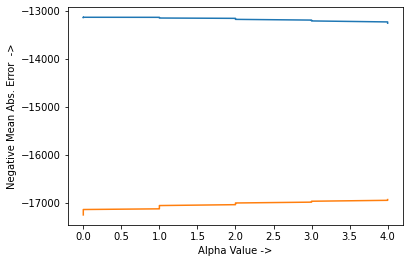

In [99]:
## Plotting and observing the results to estimate optimum alpha value
res_set['param_alpha'] = res_set['param_alpha'].astype('int')

# Plotting Alpha Value vs. Negative Mean Abs. Error to find the optimum alpha value
plt.plot(res_set['param_alpha'], res_set['mean_train_score'])
plt.plot(res_set['param_alpha'], res_set['mean_test_score'])
plt.xlabel('Alpha Value ->')
plt.ylabel('Negative Mean Abs. Error  ->')
plt.show()

#### It seems 2 could be a better alpha value, will use both the Alpha value's to find best value

#### 1. For alpha=13.22

In [100]:

ridge = Ridge(alpha=13.22)

ridge.fit(X_train_rfe, y_train)

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
print("Printing the Ridge Regression Co-efficients \n ")
list(zip(cols, model_parameters))

Printing the Ridge Regression Co-efficients 
 


[('constant', 180441.34),
 ('LotArea', 5035.679),
 ('OverallQual', 10020.182),
 ('OverallCond', 6444.446),
 ('MasVnrArea', 3700.628),
 ('BsmtFinSF1', 5053.096),
 ('BsmtFinSF2', 1039.627),
 ('BsmtUnfSF', 460.181),
 ('TotalBsmtSF', 5953.447),
 ('1stFlrSF', 8002.417),
 ('2ndFlrSF', 16569.208),
 ('LowQualFinSF', -1618.037),
 ('GrLivArea', 19397.116),
 ('BedroomAbvGr', -3089.373),
 ('KitchenAbvGr', -5360.695),
 ('Fireplaces', 1680.293),
 ('GarageArea', 4816.563),
 ('PoolArea', 1070.527),
 ('PropAge', -12462.449),
 ('MSZoning_FV', 2378.336),
 ('MSZoning_RH', 1694.76),
 ('MSZoning_RL', 6820.005),
 ('MSZoning_RM', 4130.524),
 ('Street_Pave', 2098.496),
 ('LandContour_Low', -1226.11),
 ('LotConfig_CulDSac', 2213.019),
 ('LandSlope_Sev', -1581.643),
 ('Neighborhood_Crawfor', 3861.839),
 ('Neighborhood_Edwards', -2497.277),
 ('Neighborhood_Mitchel', -2280.534),
 ('Neighborhood_NAmes', -2334.464),
 ('Neighborhood_NWAmes', -1127.388),
 ('Neighborhood_NoRidge', 6903.672),
 ('Neighborhood_NridgHt', 4

In [101]:
# Fitting the Ridge Regression to train and test data
lm=Ridge(alpha=13.22)
lm.fit(X_train_rfe, y_train)

# Predicting the train & test values
y_train_pred=lm.predict(X_train_rfe)
y_test_pred=lm.predict(X_test_rfe)

R2_train=round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4)
R2_test=round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4)

RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

AdjR2Train = round(1-(1-R2_train)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
AdjR2Test = round(1-(1-R2_test)*(X_test_rfe.shape[0]-1)/(X_test_rfe.shape[0]-X_test_rfe.shape[1]-1),4)

print("Train R2 Score",R2_train)
print("Test R2 Score",R2_test)

print('RMSE :',RMSE)

print("Adjusted R2 Train :" ,AdjR2Train)
print("Adjusted R2 Train :" ,AdjR2Test)

Train R2 Score 0.9306
Test R2 Score 0.8527
RMSE : 30786.972079908304
Adjusted R2 Train : 0.9231
Adjusted R2 Train : 0.809


#### 2. For alpha=2

In [102]:
ridge = Ridge(alpha=2)

ridge.fit(X_train_rfe, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train_rfe, y_train)

# Predicting the train & test values
y_train_pred=lm.predict(X_train_rfe)
y_test_pred=lm.predict(X_test_rfe)

R2_train=round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4)
R2_test=round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4)

RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

AdjR2Train = round(1-(1-R2_train)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
AdjR2Test = round(1-(1-R2_test)*(X_test_rfe.shape[0]-1)/(X_test_rfe.shape[0]-X_test_rfe.shape[1]-1),4)

print("Train R2 Score",R2_train)
print("Test R2 Score",R2_test)

print('RMSE :',RMSE)

print("Adjusted R2 Train :" ,AdjR2Train)
print("Adjusted R2 Train :" ,AdjR2Test)

Train R2 Score 0.9399
Test R2 Score 0.8169
RMSE : 34330.530246319475
Adjusted R2 Train : 0.9334
Adjusted R2 Train : 0.7626


In [104]:
ridge = Ridge(alpha=13.22)
ridge.fit(X_train_rfe, y_train)

#Finding Top 10 Ridge Regression Model Parameters
params = list(ridge.coef_)
params.insert(0, ridge.intercept_)
params = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")


In [105]:
RidgeParams = pd.DataFrame(list(zip(cols, params)), columns=['var', 'Coeff'])
print("Top 10 Ridge Regression Parameters are :")
RidgeParams.sort_values(by=['Coeff'], ascending = False).head(10)

Top 10 Ridge Regression Parameters are :


var       Coeff
0           constant  180441.340
46  RoofMatl_CompShg   52187.913
50  RoofMatl_Tar&Grv   29849.584
52  RoofMatl_WdShngl   28623.310
51  RoofMatl_WdShake   23201.279
12         GrLivArea   19397.116
10          2ndFlrSF   16569.208
47  RoofMatl_Membran   13911.936
48    RoofMatl_Metal   12904.932
49     RoofMatl_Roll   12266.594

In [106]:
print('Top Negatively affecting parameters are : \n')
RidgeParams.sort_values(by=['Coeff'], ascending = True).head(10)

Top Negatively affecting parameters are : 



var      Coeff
69      BsmtQual_Gd -12984.994
81   KitchenQual_TA -12982.124
80   KitchenQual_Gd -12919.534
18          PropAge -12462.449
37  Condition2_PosN -12220.874
70      BsmtQual_TA -11675.745
63     ExterQual_TA  -7127.356
14     KitchenAbvGr  -5360.695
62     ExterQual_Gd  -4477.042
40  BldgType_TwnhsE  -4420.902

In [107]:
RidgeParams.shape 

(101, 2)

In [108]:
## Ridge Reression didn't reduce any co-efficients to Zero

### 2. Lasso Regression

In [109]:
folds = 5  # cross validation factor/number of times
params = {'alpha': alphaLasso}

lasso = Lasso()

LassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
LassoModelCV.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-06, 1.17681e-06, ..., 8.49753e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [110]:
res_set = pd.DataFrame(LassoModelCV.cv_results_)
res_set = res_set[res_set['param_alpha']<=1]
res_set.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.064834      0.026890         0.000200        0.000400        1e-06   
1       0.056664      0.008141         0.000000        0.000000  1.17681e-06   
2       0.053126      0.006216         0.000191        0.000382  1.38489e-06   
3       0.053106      0.009820         0.000200        0.000399  1.62975e-06   
4       0.052888      0.003560         0.000254        0.000509  1.91791e-06   

                              params  split0_test_score  split1_test_score  \
0                   {'alpha': 1e-06}      -15629.092310      -18688.103789   
1  {'alpha': 1.1768119524349991e-06}      -15629.092310      -18688.103789   
2  {'alpha': 1.3848863713938717e-06}      -15629.092309      -18688.103789   
3  {'alpha': 1.6297508346206435e-06}      -15629.092309      -18688.103789   
4   {'alpha': 1.917910261672489e-06}      -15629.092308      -18688.103789   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0      -17340.516821      -19974.895466      -14577.400444    -17240.422031   
1      -17340.516821      -19974.895518      -14577.400441    -17240.422041   
2      -17340.516821      -19974.895580      -14577.400437    -17240.422052   
3      -17340.516821      -19974.895652      -14577.400433    -17240.422066   
4      -17340.516820      -19974.895737      -14577.400428    -17240.422081   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0     1962.908755               42       -13143.473166       -12952.334321   
1     1962.908771               43       -13143.473166       -12952.334321   
2     1962.908789               44       -13143.473167       -12952.334321   
3     1962.908810               45       -13143.473167       -12952.334321   
4     1962.908836               46       -13143.473167       -12952.334321   

   split2_train_score  split3_train_score  split4_train_score  \
0        -13301.82466        -13131.54131       -13172.103975   
1        -13301.82466        -13131.54131       -13172.103975   
2        -13301.82466        -13131.54131       -13172.103976   
3        -13301.82466        -13131.54131       -13172.103976   
4        -13301.82466        -13131.54131       -13172.103976   

   mean_train_score  std_train_score  
0     -13140.255487       111.820909  
1     -13140.255487       111.820909  
2     -13140.255487       111.820909  
3     -13140.255487       111.820909  
4     -13140.255487       111.820910

In [111]:
alpha = 10
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([ 6.06231325e+03,  8.06397076e+03,  7.13914082e+03,  4.14247974e+03,
        6.60311774e+03,  3.41101202e+02, -0.00000000e+00,  1.31665769e+04,
        1.59792410e+04,  2.71538053e+04, -1.09815927e+03,  8.76622053e+03,
       -4.58054445e+03, -6.26132519e+03,  2.53781014e+03,  4.94166523e+03,
        3.74721822e+03, -1.36315667e+04,  4.15157262e+03,  2.61105989e+03,
        9.82554702e+03,  7.40158825e+03,  2.14289684e+03, -1.71571770e+03,
        1.81074482e+03, -2.89791599e+03,  3.76013878e+03, -1.88401606e+03,
       -2.53621849e+03, -2.48569275e+03, -1.65910541e+03,  5.44550329e+03,
        3.37532042e+03,  3.87037648e+03,  2.28095370e+03,  3.82198603e+03,
       -1.38788047e+04, -2.82735931e+03, -3.69546623e+03, -3.98486733e+03,
        1.68402414e+03,  3.11267475e+03, -2.28046816e+03,  1.75270425e+03,
        2.62312054e+03,  9.51240719e+04,  2.50374942e+04,  2.36791182e+04,
        2.25607565e+04,  5.55556012e+04,  4.40186131e+04,  4.87278255e+04,
       -3.85966509e+02,  

In [112]:
best_alpha = round(LassoModelCV.best_params_['alpha'],2)

print("Best Alpha:", best_alpha)

Best Alpha: 10.0


In [113]:

lasso = Lasso(alpha=10)

lasso.fit(X_train_rfe, y_train)

# ridge model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
print("Printing the Ridge Regression Co-efficients \n ")
list(zip(cols, model_parameters))

Printing the Ridge Regression Co-efficients 
 


[('constant', 180441.34),
 ('LotArea', 6062.313),
 ('OverallQual', 8063.971),
 ('OverallCond', 7139.141),
 ('MasVnrArea', 4142.48),
 ('BsmtFinSF1', 6603.118),
 ('BsmtFinSF2', 341.101),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 13166.577),
 ('1stFlrSF', 15979.241),
 ('2ndFlrSF', 27153.805),
 ('LowQualFinSF', -1098.159),
 ('GrLivArea', 8766.221),
 ('BedroomAbvGr', -4580.544),
 ('KitchenAbvGr', -6261.325),
 ('Fireplaces', 2537.81),
 ('GarageArea', 4941.665),
 ('PoolArea', 3747.218),
 ('PropAge', -13631.567),
 ('MSZoning_FV', 4151.573),
 ('MSZoning_RH', 2611.06),
 ('MSZoning_RL', 9825.547),
 ('MSZoning_RM', 7401.588),
 ('Street_Pave', 2142.897),
 ('LandContour_Low', -1715.718),
 ('LotConfig_CulDSac', 1810.745),
 ('LandSlope_Sev', -2897.916),
 ('Neighborhood_Crawfor', 3760.139),
 ('Neighborhood_Edwards', -1884.016),
 ('Neighborhood_Mitchel', -2536.218),
 ('Neighborhood_NAmes', -2485.693),
 ('Neighborhood_NWAmes', -1659.105),
 ('Neighborhood_NoRidge', 5445.503),
 ('Neighborhood_NridgHt', 3375.3

In [114]:
# ridge regression
lm = Lasso(alpha=10)
lm.fit(X_train_rfe, y_train)

# Predicting the train & test values
y_train_pred=lm.predict(X_train_rfe)
y_test_pred=lm.predict(X_test_rfe)

R2_train=round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4)
R2_test=round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4)

RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

AdjR2Train = round(1-(1-R2_train)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
AdjR2Test = round(1-(1-R2_test)*(X_test_rfe.shape[0]-1)/(X_test_rfe.shape[0]-X_test_rfe.shape[1]-1),4)

print("Train R2 Score",R2_train)
print("Test R2 Score",R2_test)

print('RMSE :',RMSE)

print("Adjusted R2 Train :" ,AdjR2Train)
print("Adjusted R2 Train :" ,AdjR2Test)

Train R2 Score 0.9405
Test R2 Score 0.8017
RMSE : 35727.6460535481
Adjusted R2 Train : 0.934
Adjusted R2 Train : 0.7429


Text(0, 0.5, 'y_train_pred')

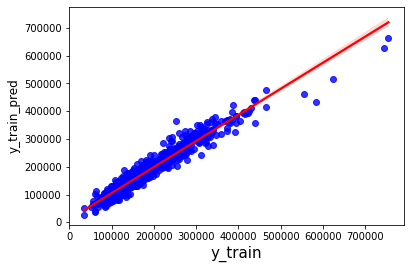

In [115]:
# Plotting regression line on training and predicted data
sns.regplot(x=y_train, y=pd.DataFrame(y_train_pred), fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_train', fontsize = 15)
plt.ylabel('y_train_pred', fontsize = 12) 

In [116]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_rfe, y_train)

#Finding Top 10 Ridge Regression Model Parameters
params = list(lasso.coef_)
params.insert(0, lasso.intercept_)
params = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")

In [117]:
LassoParams = pd.DataFrame(list(zip(cols, params)), columns=['var', 'Coeff'])
print("Top 10 Lasso Regression Parameters are :")
LassoParams.sort_values(by=['Coeff'], ascending = False).head(20)

Top 10 Lasso Regression Parameters are :


var       Coeff
0               constant  180441.340
46      RoofMatl_CompShg   95124.072
50      RoofMatl_Tar&Grv   55555.601
52      RoofMatl_WdShngl   48727.826
51      RoofMatl_WdShake   44018.613
10              2ndFlrSF   27153.805
47      RoofMatl_Membran   25037.494
48        RoofMatl_Metal   23679.118
49         RoofMatl_Roll   22560.757
9               1stFlrSF   15979.241
8            TotalBsmtSF   13166.577
21           MSZoning_RL    9825.547
12             GrLivArea    8766.221
2            OverallQual    8063.971
22           MSZoning_RM    7401.588
3            OverallCond    7139.141
5             BsmtFinSF1    6603.118
1                LotArea    6062.313
85        Functional_Typ    6039.366
32  Neighborhood_NoRidge    5445.503

In [118]:
print('Top Negatively affecting parameters are : \n')
LassoParams.sort_values(by=['Coeff'], ascending = True).head(10)

Top Negatively affecting parameters are : 



var      Coeff
37  Condition2_PosN -13878.805
18          PropAge -13631.567
80   KitchenQual_Gd -13177.135
81   KitchenQual_TA -13127.509
69      BsmtQual_Gd -12716.464
70      BsmtQual_TA -11154.066
63     ExterQual_TA  -9923.167
62     ExterQual_Gd  -7487.162
14     KitchenAbvGr  -6261.325
13     BedroomAbvGr  -4580.544

### Below are the statistics with the Various models created

In [119]:
# Linear Regression without RFE :

# RMSE on Train Set: 17905.351627248183
# RMSE on Test Set: 4205841426624466.0
# R-squared on Train Set: 0.9486993100384195
# R-squared on Test Set: -2.7487112073205567e+21

In [120]:
# Linear Regression with RFE :

# RMSE on Train Set: 18908.847084349876
# RMSE on Test Set: 36065.29107362122
# R-squared on Train Set: 0.9427879384388915
# R-squared on Test Set: 0.7978832958933367

In [121]:
# Ridge Regresion : Alpha =13.22

# Train R2 Score 0.9321
# Test R2 Score 0.8517
# RMSE : 30893.646305187514
# Adjusted R2 Train : 0.9247
# Adjusted R2 Train : 0.8077

In [122]:
# Lasso Regression : Alpha =10

# Train R2 Score 0.9428
# Test R2 Score 0.8002
# RMSE : 35856.44911602793
# Adjusted R2 Train : 0.9366
# Adjusted R2 Train : 0.7409

### Conclusion : From the above statistices, we can observe that Ridge regression perform better than Lasso, we would still choose considering the below factors
####    * To create a more generic model
####    * To keep both Bias and future Variance under check
####    * To reduce the number of predictor variables

### From our Analysis, we found that the below Features contirubte positively to the SalePrice :
####    * RoofMatl: Roof material
####    * OverallQual: Rates the overall material and finish of the house
####    * 2ndFlrSF: Second floor square feet
####    * TotalBsmtSF: Total square feet of basement area
####    * GrLivArea: Above grade (ground) living area square feet
####    * OverallQual: Rates the overall material and finish of the house
####    * MSZoning: Identifies the general zoning classification of the sale.

### & the below Features contributed negatively to the SalePrice:
####    * PropAge : Age of the property
####    *KitchenQual: Kitchen quality
####    *BsmtQual: Evaluates the height of the basement
####    *ExterQual: Evaluates the quality of the material on the exterior 


In [123]:
##### Test the question answer here 

In [124]:
#Q1What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [125]:
ridge = Ridge(alpha=26.44)
ridge.fit(X_train_rfe, y_train)

#Finding Top 10 Ridge Regression Model Parameters
params = list(ridge.coef_)
params.insert(0, ridge.intercept_)
params = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")

LassoParams = pd.DataFrame(list(zip(cols, params)), columns=['var', 'Coeff'])
print("Top 10 Lasso Regression Parameters are :")
LassoParams.sort_values(by=['Coeff'], ascending = False).head(10)

Top 10 Lasso Regression Parameters are :


var       Coeff
0           constant  180441.340
46  RoofMatl_CompShg   95124.072
50  RoofMatl_Tar&Grv   55555.601
52  RoofMatl_WdShngl   48727.826
51  RoofMatl_WdShake   44018.613
10          2ndFlrSF   27153.805
47  RoofMatl_Membran   25037.494
48    RoofMatl_Metal   23679.118
49     RoofMatl_Roll   22560.757
9           1stFlrSF   15979.241

In [126]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_rfe, y_train)

#Finding Top 10 Ridge Regression Model Parameters
params = list(lasso.coef_)
params.insert(0, lasso.intercept_)
params = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
LassoParams = pd.DataFrame(list(zip(cols, params)), columns=['var', 'Coeff'])
print("Top 10 Lasso Regression Parameters are :")
LassoParams.sort_values(by=['Coeff'], ascending = False).head(10)

Top 10 Lasso Regression Parameters are :


var       Coeff
0           constant  180441.340
46  RoofMatl_CompShg   95124.072
50  RoofMatl_Tar&Grv   55555.601
52  RoofMatl_WdShngl   48727.826
51  RoofMatl_WdShake   44018.613
10          2ndFlrSF   27153.805
47  RoofMatl_Membran   25037.494
48    RoofMatl_Metal   23679.118
49     RoofMatl_Roll   22560.757
9           1stFlrSF   15979.241

In [127]:
##Q3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [128]:
folds = 5  # cross validation factor/number of times
params = {'alpha': alphaLasso}

lasso = Lasso()
skip_cols=['RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShngl','RoofMatl_WdShake','2ndFlrSF']

new_x_train= X_train_rfe.drop(skip_cols,axis=1)

LassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)     

LassoModelCV.fit(new_x_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   24.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-06, 1.17681e-06, ..., 8.49753e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [129]:
res_set = pd.DataFrame(LassoModelCV.cv_results_)
res_set = res_set[res_set['param_alpha']<=1]
res_set.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.055107      0.006719         0.000393        0.000482        1e-06   
1       0.050207      0.000388         0.000000        0.000000  1.17681e-06   
2       0.047048      0.006369         0.000000        0.000000  1.38489e-06   
3       0.055365      0.006762         0.000416        0.000510  1.62975e-06   
4       0.053701      0.011041         0.000228        0.000455  1.91791e-06   

                              params  split0_test_score  split1_test_score  \
0                   {'alpha': 1e-06}      -18223.488976      -18815.688863   
1  {'alpha': 1.1768119524349991e-06}      -18223.488975      -18815.688872   
2  {'alpha': 1.3848863713938717e-06}      -18223.488974      -18815.688883   
3  {'alpha': 1.6297508346206435e-06}      -18223.488972      -18815.688895   
4   {'alpha': 1.917910261672489e-06}      -18223.488970      -18815.688910   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0      -19347.210760      -17997.107027      -15777.167553    -18032.320056   
1      -19347.210759      -17997.107079      -15777.167550    -18032.320068   
2      -19347.210758      -17997.107139      -15777.167547    -18032.320081   
3      -19347.210758      -17997.107211      -15777.167543    -18032.320096   
4      -19347.210757      -17997.107295      -15777.167539    -18032.320115   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0     1221.390110               14       -15784.177426       -13161.424892   
1     1221.390112               15       -15784.177426       -13161.424892   
2     1221.390114               16       -15784.177426       -13161.424892   
3     1221.390116               17       -15784.177425       -13161.424892   
4     1221.390119               18       -15784.177425       -13161.424892   

   split2_train_score  split3_train_score  split4_train_score  \
0       -16052.248323       -15737.225817       -15884.593276   
1       -16052.248323       -15737.225817       -15884.593276   
2       -16052.248322       -15737.225817       -15884.593276   
3       -16052.248322       -15737.225816       -15884.593276   
4       -16052.248322       -15737.225816       -15884.593276   

   mean_train_score  std_train_score  
0     -15323.933947      1086.633365  
1     -15323.933947      1086.633365  
2     -15323.933947      1086.633365  
3     -15323.933946      1086.633365  
4     -15323.933946      1086.633365

In [130]:
best_alpha = round(LassoModelCV.best_params_['alpha'],2)

print("Best Alpha:", best_alpha)



Best Alpha: 10.0


In [131]:

lasso = Lasso(alpha=10)

lasso.fit(new_x_train, y_train)

# ridge model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = new_x_train.columns
cols = cols.insert(0, "constant")
print("Printing the Ridge Regression Co-efficients \n ")
LassoParams = pd.DataFrame(list(zip(cols, model_parameters)), columns=['var', 'Coeff'])
print("Top 10 Lasso Regression Parameters are :")
LassoParams.sort_values(by=['Coeff'], ascending = False).head(10)

Printing the Ridge Regression Co-efficients 
 
Top 10 Lasso Regression Parameters are :


var       Coeff
0               constant  180441.340
11             GrLivArea   41997.999
20           MSZoning_RL   12038.739
2            OverallQual   10942.035
41     HouseStyle_1Story    9233.871
31  Neighborhood_NoRidge    8936.764
21           MSZoning_RM    8170.150
68       BsmtExposure_Gd    6522.242
32  Neighborhood_NridgHt    5956.690
3            OverallCond    5592.339